In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer, Imputer, MinMaxScaler

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# Set display width options
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Training Data
---

In [3]:
PATH = './ml_case_data/'

### Customer Features: Jan-16
---

In [4]:
train_data  = pd.read_csv(PATH+'ml_case_training_data.csv', index_col='id')
train_data['date_activ'] = pd.to_datetime(train_data['date_activ'], format='%Y-%m-%d', errors='coerce')
train_data['date_end'] = pd.to_datetime(train_data['date_end'], format='%Y-%m-%d', errors='coerce')
train_data['date_first_activ'] = pd.to_datetime(train_data['date_first_activ'], format='%Y-%m-%d', errors='coerce')
train_data['date_modif_prod'] = pd.to_datetime(train_data['date_modif_prod'], format='%Y-%m-%d', errors='coerce')
train_data['date_renewal'] = pd.to_datetime(train_data['date_renewal'], format='%Y-%m-%d', errors='coerce')
train_data.head()

,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaT,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,NaT,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaT,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaT,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaT,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [155]:
train_data.shape

(16096, 31)

### Preprocessing
---

In [5]:
train_data.describe()

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max
count,0.0,1.609600e+04,1.609600e+04,1.609600e+04,3508.000000,3508.000000,3508.000000,3508.000000,16096.000000,16096.000000,15970.000000,16096.000000,15970.000000,15970.000000,15970.000000,16096.000000,16083.000000,16083.000000,16096.000000,16081.000000,16096.000000,16093.000000
mean,NaN,1.948044e+05,3.191164e+04,1.946154e+04,335.843857,335.843857,3837.441866,206.845165,2370.555949,1907.347229,0.991547,70.309945,0.135901,0.052951,43.533496,196.123447,22.462276,21.460318,1.347788,217.987028,5.030629,20.604131
std,NaN,6.795151e+05,1.775885e+05,8.235676e+04,649.406000,649.406000,5425.744327,455.634288,4035.085664,5257.364759,5.160969,79.023251,0.026252,0.048617,5.212252,494.366979,23.700883,27.917349,1.459808,366.742030,1.676101,21.772421
min,NaN,-1.252760e+05,-3.037000e+03,-9.138600e+04,-364.940000,-364.940000,-2503.480000,0.000000,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000
25%,NaN,5.906250e+03,0.000000e+00,0.000000e+00,0.000000,0.000000,1158.175000,0.000000,513.230000,0.000000,0.000000,16.230000,0.115237,0.000000,40.606701,0.000000,11.960000,11.950000,1.000000,51.970000,4.000000,12.500000
50%,NaN,1.533250e+04,0.000000e+00,9.010000e+02,162.955000,162.955000,2187.230000,42.215000,1179.160000,378.000000,0.000000,19.440000,0.142881,0.086163,44.311378,44.465000,21.090000,20.970000,1.000000,119.680000,5.000000,13.856000
75%,NaN,5.022150e+04,0.000000e+00,4.127000e+03,396.185000,396.185000,4246.555000,228.117500,2692.077500,1994.250000,0.000000,131.470000,0.146348,0.098837,44.311378,218.090000,29.640000,29.640000,1.000000,275.810000,6.000000,19.800000
max,NaN,1.609711e+07,4.188440e+06,4.538720e+06,12566.080000,12566.080000,81122.630000,9682.890000,103801.930000,175375.000000,50.000000,2411.690000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,24570.650000,16.000000,500.000000


In [6]:
train_data.dtypes

activity_new                        object
campaign_disc_ele                  float64
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_first_activ            datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_base_bill_ele             float64
forecast_base_bill_year            float64
forecast_bill_12m                  float64
forecast_cons                      float64
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                             object
imp_cons   

In [7]:
# Percent of missing data
train_data.isnull().sum()/len(train_data)*100.0

activity_new                 59.300447
campaign_disc_ele           100.000000
channel_sales                26.205268
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.012425
date_first_activ             78.205765
date_modif_prod               0.975398
date_renewal                  0.248509
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.782803
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.782803
forecast_price_energy_p2      0.782803
forecast_price_pow_p1         0.782803
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele          0.080765
margin_net_pow_ele       

In [8]:
train_data_pre = train_data.copy()
train_data_pre.campaign_disc_ele.isnull().all()

True

In [9]:
# Drop columns with >75% of missing observations
train_data_pre = train_data_pre[train_data_pre.columns[train_data_pre.isnull().mean() < 0.75]]
train_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
24011ae4ebbe3035111d65fa7c15bc57,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
764c75f661154dac3a6c254cd082ea7d,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
bba03439a292a1e166f80264c16191cb,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [10]:
# Convert missing activity_new data to NA
train_data_pre.activity_new = train_data_pre.activity_new.fillna(value='NA_activity_new')
# Convert missing channel_sales data (categorical) to NA
train_data_pre.channel_sales = train_data_pre.channel_sales.fillna(value='NA_channel_sales')
# Convert missing origin_up data to NA
train_data_pre.origin_up = train_data_pre.origin_up.fillna(value='NA_origin_up')

In [11]:
# How many levels do each of the categorical variables have?
print('activity_new has %s levels' % train_data_pre.activity_new.nunique())
print('channel_sales has %s levels' % train_data_pre.channel_sales.nunique())
print('origin_up has %s levels' % train_data_pre.origin_up.nunique())
print('has_gas has %s levels' % train_data.has_gas.nunique())

activity_new has 420 levels
channel_sales has 8 levels
origin_up has 6 levels
has_gas has 2 levels


There were several options here. OHE creating dummy variables would turn this into a fairly sparse matrix given the 420+ levels. Dimensionality reduction could also have worked using PCA or t-SNE but there was a risk of throwing away a lot of data. Ultimately decided to use Label Encoding even though ordinality creeps into the results.

In [12]:
# Convert has_gas t and f responses to 0 and 1
lb = LabelBinarizer()
train_data_pre.has_gas = lb.fit_transform(train_data.has_gas)

In [13]:
# Use Label Encoder for categorical variables
train_activity_new_cat = pd.DataFrame(train_data_pre.activity_new.astype('category').cat.codes)
train_channel_sales_cat = pd.DataFrame(train_data_pre.channel_sales.astype('category').cat.codes)
train_origin_up_cat = pd.DataFrame(train_data_pre.origin_up.astype('category').cat.codes)

train_activity_new_cat.columns = ['activity_new_cat']
train_channel_sales_cat.columns = ['channel_sales_cat']
train_origin_up_cat.columns = ['origin_up_cat']

In [154]:
train_activity_new_cat.head(10)

,activity_new_cat
id,
48ada52261e7cf58715202705a0451c9,122
24011ae4ebbe3035111d65fa7c15bc57,0
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0
568bb38a1afd7c0fc49c77b3789b59a3,331
149d57cf92fc41cf94415803a877cb4b,0
1aa498825382410b098937d65c4ec26d,0
7ab4bf4878d8f7661dfc20e9b8e18011,337


In [14]:
# Use imputation (mean) to fill in the rest of the variables
imputer = Imputer()
train_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin',
               'pow_max']] = imputer.fit_transform(train_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']])

In [15]:
train_data_pre.isnull().sum()/len(train_data_pre)*100.0

activity_new                0.000000
channel_sales               0.000000
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.012425
date_modif_prod             0.975398
date_renewal                0.248509
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.000000
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.000000
forecast_price_energy_p2    0.000000
forecast_price_pow_p1       0.000000
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000000
margin_net_pow_ele          0.000000
nb_prod_act                 0.000000
net_margin                  0.000000
num_years_antig             0.000000
origin_up                   0.000000
pow_max                     0.000000
dtype: float64

### Feature Engineering
---

It's important to not introduce any features that we would not have known by the end of Jan 2016

>1. Length of the contract in days
2. How many days since the end of contract was their last renewal?
3. How many days since their last product modification?
4. Was last month's electricity consumption > average of the last 11 months?

In [16]:
# Length of the contract in days
train_data_pre['contract_length_days'] = (train_data_pre.date_end - train_data.date_activ).dt.days
train_data_pre.contract_length_days.describe()

count    16094.000000
mean      2018.156704
std        627.256689
min        365.000000
25%       1461.000000
50%       1834.000000
75%       2402.000000
max       5925.000000
Name: contract_length_days, dtype: float64

In [17]:
# How many days since the end of the contract was the last renewal?
train_data_pre['days_ago_renewed'] = (train_data_pre.date_end - train_data.date_renewal).dt.days
train_data_pre.days_ago_renewed.describe()

count    16056.000000
mean       372.901844
std         55.376169
min       -374.000000
25%        363.000000
50%        365.000000
75%        365.000000
max       1212.000000
Name: days_ago_renewed, dtype: float64

In [18]:
# How many days since the last product modification?
train_data_pre['days_since_product_mod'] = (train_data_pre.date_end - train_data.date_renewal).dt.days
train_data_pre.days_since_product_mod.describe()

count    16056.000000
mean       372.901844
std         55.376169
min       -374.000000
25%        363.000000
50%        365.000000
75%        365.000000
max       1212.000000
Name: days_since_product_mod, dtype: float64

In [20]:
# What was usage in the last month compared to average usage in the previous 11 months?
train_data_pre['cons_11M_1M'] = \
    train_data_pre.cons_last_month - (train_data_pre.cons_12m - train_data_pre.cons_last_month)/11
train_data_pre.cons_11M_1M.describe()

count    1.609600e+04
mean     3.521277e+03
std      4.099944e+04
min     -4.096960e+05
25%     -8.596818e+02
50%     -1.058182e+02
75%      6.182727e+02
max      3.487957e+06
Name: cons_11M_1M, dtype: float64

In [21]:
# Energy usage uptick
train_data_pre['cons_uptick'] = np.where(train_data_pre['cons_11M_1M'] < 0, 0, 1)
train_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,2012-11-07,2015-11-09,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,0,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000,1460.0,363.0,363.0,-17179.545455,0
24011ae4ebbe3035111d65fa7c15bc57,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaT,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,1,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1096.0,358.0,358.0,0.000000,1
d29c2c54acc38ff3c0614d0a653813dd,NA_activity_new,NA_channel_sales,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,0,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,2566.0,365.0,365.0,-423.636364,0
764c75f661154dac3a6c254cd082ea7d,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,0,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,2192.0,365.0,365.0,-49.454545,0
bba03439a292a1e166f80264c16191cb,NA_activity_new,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,0,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,2192.0,365.0,365.0,-144.000000,0


In [22]:
train_data_pre.dtypes

activity_new                        object
channel_sales                       object
cons_12m                             int64
cons_gas_12m                         int64
cons_last_month                      int64
date_activ                  datetime64[ns]
date_end                    datetime64[ns]
date_modif_prod             datetime64[ns]
date_renewal                datetime64[ns]
forecast_cons_12m                  float64
forecast_cons_year                   int64
forecast_discount_energy           float64
forecast_meter_rent_12m            float64
forecast_price_energy_p1           float64
forecast_price_energy_p2           float64
forecast_price_pow_p1              float64
has_gas                              int64
imp_cons                           float64
margin_gross_pow_ele               float64
margin_net_pow_ele                 float64
nb_prod_act                          int64
net_margin                         float64
num_years_antig                      int64
origin_up  

### Pricing Data: 2015
---

In [23]:
train_hist_data = pd.read_csv(PATH+'ml_case_training_hist_data.csv', index_col='id')
train_hist_data['price_date'] = pd.to_datetime(train_hist_data['price_date'], format='%Y-%m-%d', errors='coerce')
train_hist_data.head(20)

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.000000,0.000000,44.266931,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-06-01,0.149626,0.000000,0.000000,44.266930,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-07-01,0.150321,0.000000,0.000000,44.444710,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-08-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000
038af19179925da21a25619c5a24b745,2015-09-01,0.145859,0.000000,0.000000,44.444710,0.000000,0.000000


In [24]:
train_hist_data.isnull().sum()

price_date         0
price_p1_var    1359
price_p2_var    1359
price_p3_var    1359
price_p1_fix    1359
price_p2_fix    1359
price_p3_fix    1359
dtype: int64

In [25]:
# We seem to be without any time-series data for these customers
train_hist_data[train_hist_data.price_p1_var.isnull()].tail()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
2dc2c9a9f6e6896d9a07d7bcbb9d0ce9,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
e4053a0ad6c55e4665e8e9adb9f75db5,2015-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1a788ca3bfb16ce443dcf7d75e702b5d,2015-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1a788ca3bfb16ce443dcf7d75e702b5d,2015-07-01,NaN,NaN,NaN,NaN,NaN,NaN
d625f9e90d4af9986197444361e99235,2015-05-01,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
train_hist_data.dropna(inplace=True)
train_hist_data.isnull().sum()

price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [27]:
train_hist_data[train_hist_data.price_p1_var.isnull()]

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,


In [28]:
# How many unique users do we have historical data for?
train_hist_data.index.nunique()

16094

In [29]:
# % of customers w/o energy pricing for p1?
(train_hist_data.groupby('id')['price_p1_var'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

0.1366969056791351

In [30]:
# Pct customers w/o energy pricing for p2?
(train_hist_data.groupby('id')['price_p2_var'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

45.047843916987695

In [31]:
# Pct customers w/o energy pricing for p3?
(train_hist_data.groupby('id')['price_p3_var'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

57.878712563688325

In [32]:
# % of customers w/o power pricing for p1?
(train_hist_data.groupby('id')['price_p1_fix'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

0.739405989809867

In [33]:
# Pct customers w/o power pricing for p2?
(train_hist_data.groupby('id')['price_p2_fix'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

57.959488007953276

In [34]:
# Pct customers w/o power pricing for p3?
(train_hist_data.groupby('id')['price_p3_fix'].mean() == 0).sum()/train_hist_data.index.nunique()*100.0

57.959488007953276

In [35]:
train_hist_data.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


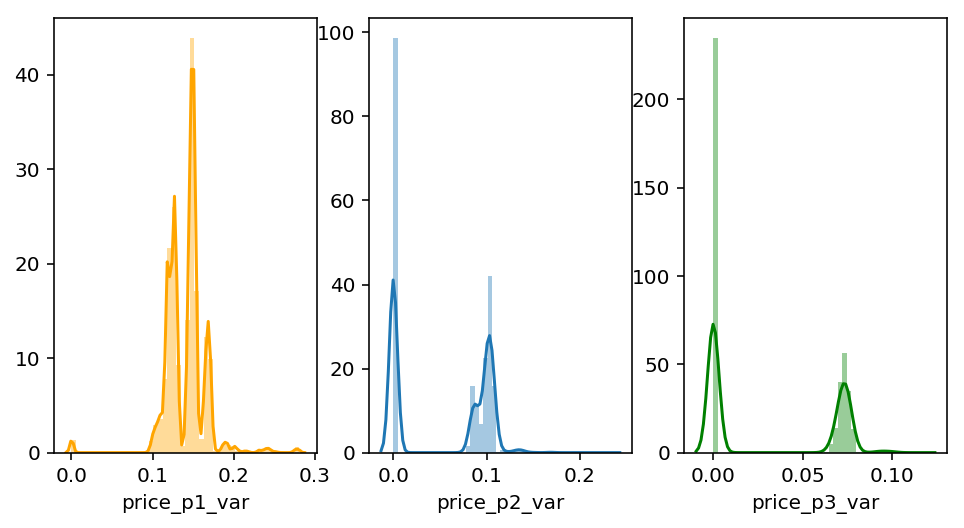

In [36]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(8,4))
ax1 = sns.distplot(train_hist_data.price_p1_var.dropna(), ax=ax1, color='orange')
# where available
ax2 = sns.distplot(train_hist_data.price_p2_var.dropna(), ax=ax2)
# where available
ax3 = sns.distplot(train_hist_data.price_p3_var.dropna(), ax=ax3, color='green')
plt.show()

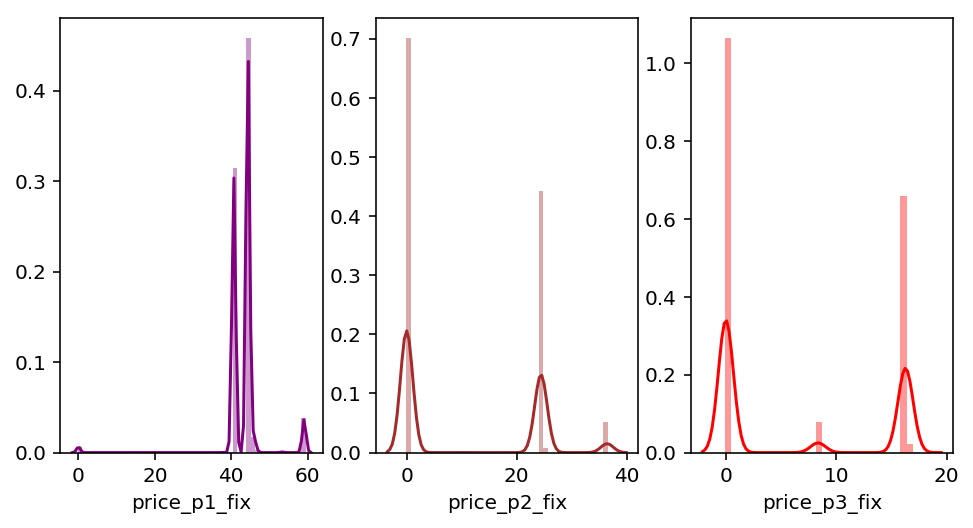

In [37]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize=(8,4))
ax1 = sns.distplot(train_hist_data.price_p1_fix.dropna(), ax=ax1, color='purple')
# where available
ax2 = sns.distplot(train_hist_data.price_p2_fix.dropna(), ax=ax2, color='brown')
# where available
ax3 = sns.distplot(train_hist_data.price_p3_fix.dropna(), ax=ax3, color='red')
plt.show()

In [38]:
# Does customer have multiple pricing levels
train_hist_data_pre = train_hist_data.copy()
train_hist_data_pre['energy_p1_mean'] = train_hist_data.groupby('id')['price_p1_var'].mean()
train_hist_data_pre['energy_p2_mean'] = train_hist_data.groupby('id')['price_p2_var'].mean()
train_hist_data_pre['energy_p3_mean'] = train_hist_data.groupby('id')['price_p3_var'].mean()
train_hist_data_pre['power_p1_mean'] = train_hist_data.groupby('id')['price_p1_fix'].mean()
train_hist_data_pre['power_p2_mean'] = train_hist_data.groupby('id')['price_p2_fix'].mean()
train_hist_data_pre['power_p3_mean'] = train_hist_data.groupby('id')['price_p3_fix'].mean()
train_hist_data_pre.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean
id,,,,,,,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0
038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0,0.14855,0.0,0.0,44.35582,0.0,0.0


In [39]:
train_hist_data_pre.index.nunique()

16094

In [40]:
train_hist_data_pre = train_hist_data_pre.groupby(['id'])[['energy_p1_mean', 'energy_p2_mean', 'energy_p3_mean',
                                    'power_p1_mean', 'power_p2_mean', 'power_p3_mean']].mean()

In [41]:
train_hist_data_pre.shape

(16094, 6)

In [42]:
# Multiple energy levels or multiple power levels?
train_hist_data_pre['multiple_energy_levels'] = \
np.where((train_hist_data_pre.energy_p2_mean == 0)|(train_hist_data_pre.energy_p3_mean == 0), 0, 1)
train_hist_data_pre['multiple_power_levels'] = \
np.where((train_hist_data_pre.power_p2_mean == 0)|(train_hist_data_pre.power_p3_mean == 0), 0, 1)
train_hist_data_pre.head()

,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels
id,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.124338,0.103794,0.073160,40.701732,24.421038,16.280694,1,1
0004351ebdd665e6ee664792efc4fd13,0.146426,0.000000,0.000000,44.385450,0.000000,0.000000,0,0
0010bcc39e42b3c2131ed2ce55246e3c,0.181558,0.000000,0.000000,45.319710,0.000000,0.000000,0,0
0010ee3855fdea87602a5b7aba8e42de,0.118757,0.098292,0.069032,40.647427,24.388455,16.258971,1,1
00114d74e963e47177db89bc70108537,0.147926,0.000000,0.000000,44.266930,0.000000,0.000000,0,0


### Churn Data: Mar-16
---

In [43]:
train_churn_data = pd.read_csv(PATH+'ml_case_training_output.csv', index_col='id')
train_churn_data.head()

,churn
id,
48ada52261e7cf58715202705a0451c9,0
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0


In [44]:
train_churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16096 entries, 48ada52261e7cf58715202705a0451c9 to 563dde550fd624d7352f3de77c0cdfcd
Data columns (total 1 columns):
churn    16096 non-null int64
dtypes: int64(1)
memory usage: 251.5+ KB


In [45]:
pct_Churn = train_churn_data.sum()/len(train_churn_data)
pct_Churn*100.0

churn    9.909294
dtype: float64

In [46]:
train_churn_data.churn.value_counts()

0    14501
1     1595
Name: churn, dtype: int64

In [47]:
14501/1595

9.09153605015674

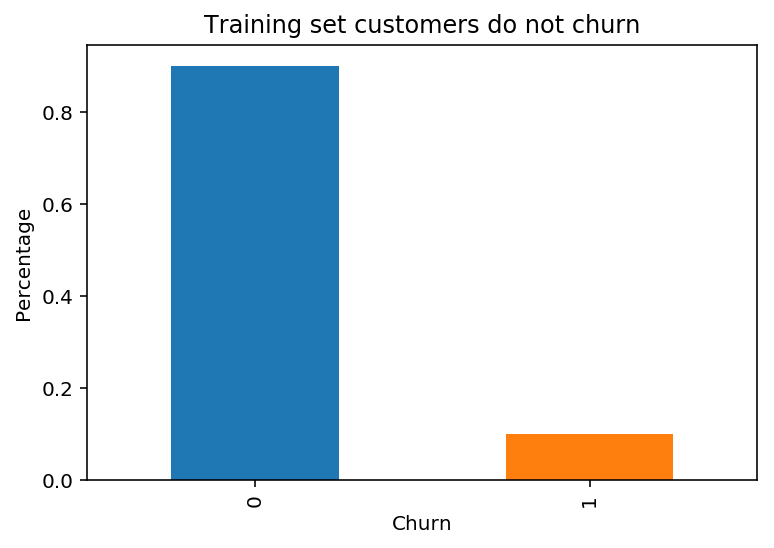

In [48]:
fig, ax = plt.subplots()
ax = train_churn_data.churn.value_counts(normalize=True).plot(kind='bar')
ax.set_xlabel('Churn')
ax.set_ylabel('Percentage')
plt.title('Training set customers do not churn')
plt.show()

### Scaling Variables
---
Standardize trainind datasets into a scale between 0 and 1 before using them together.

In [49]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [50]:
train_data_pre_scaled = normalize(train_data_pre.drop(['activity_new', 'channel_sales', 'origin_up','date_activ', 'date_end', 'date_modif_prod',
       'date_renewal'], axis=1))

In [51]:
train_data_pre_scaled.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick
id,,,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,0.026787,0.000725,0.021903,0.358612,0.36648,0.0,0.226866,0.350117,0.450808,0.992466,0.0,0.409867,0.537426,0.579521,0.000000,0.204785,0.133333,0.358717,0.196942,0.464691,0.464691,0.100706,0.0
24011ae4ebbe3035111d65fa7c15bc57,0.007722,0.013834,0.019737,0.138510,0.32807,0.0,0.092193,0.417870,0.500788,0.683750,1.0,0.375325,0.612078,0.647380,0.032258,0.168107,0.133333,0.085467,0.131475,0.461538,0.461538,0.105114,1.0
d29c2c54acc38ff3c0614d0a653813dd,0.008010,0.000725,0.019737,0.140087,0.32807,0.0,0.097651,0.531864,0.000000,0.745944,0.0,0.375325,0.602013,0.638231,0.000000,0.145123,0.333333,0.025651,0.395863,0.465952,0.465952,0.105005,0.0
764c75f661154dac3a6c254cd082ea7d,0.007756,0.000725,0.019737,0.138908,0.32807,0.0,0.106108,0.605169,0.448521,0.745944,0.0,0.375325,0.615588,0.650571,0.000000,0.144695,0.333333,0.025764,0.328597,0.465952,0.465952,0.105101,0.0
bba03439a292a1e166f80264c16191cb,0.007820,0.000725,0.019737,0.140502,0.32807,0.0,0.098992,0.535452,0.000000,0.745944,0.0,0.375325,0.617388,0.652206,0.000000,0.145352,0.333333,0.024449,0.328597,0.465952,0.465952,0.105077,0.0


In [54]:
train_hist_data_scaled = normalize(train_hist_data_pre)
train_hist_data_scaled.head()

,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels
id,,,,,,,,
0002203ffbb812588b632b9e628cc38d,0.446043,0.528818,0.710629,0.684699,0.669240,0.967999,1.0,1.0
0004351ebdd665e6ee664792efc4fd13,0.525280,0.000000,0.000000,0.746668,0.000000,0.000000,0.0,0.0
0010bcc39e42b3c2131ed2ce55246e3c,0.651310,0.000000,0.000000,0.762384,0.000000,0.000000,0.0,0.0
0010ee3855fdea87602a5b7aba8e42de,0.426021,0.500789,0.670529,0.683785,0.668347,0.966707,1.0,1.0
00114d74e963e47177db89bc70108537,0.530659,0.000000,0.000000,0.744674,0.000000,0.000000,0.0,0.0


In [52]:
train_activity_new_norm = normalize(train_activity_new_cat)
train_origin_up_norm = normalize(train_origin_up_cat)
train_channel_sales_norm = normalize(train_channel_sales_cat)

### Merge DataFrames
---
>1. Consumer Features
2. Aggregate Time Series Data
3. OHE and Label Encoded Variables
4. Customer churn

In [52]:
train_data_pre_scaled.shape

(16096, 23)

In [55]:
merged_df = pd.concat([train_data_pre_scaled, train_hist_data_scaled, train_origin_up_norm, 
                       train_channel_sales_norm, train_activity_new_norm, train_churn_data], axis=1)
merged_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels,origin_up_cat,channel_sales_cat,activity_new_cat,churn
0002203ffbb812588b632b9e628cc38d,0.009081,0.000725,0.020403,0.144561,0.329699,0.0,0.143865,0.426700,0.510346,0.683750,0.0,0.377019,0.631674,0.665192,0.000000,0.147300,0.333333,0.032565,0.334353,0.463430,0.463430,0.105463,1.0,0.446043,0.528818,0.710629,0.684699,0.669240,0.967999,1.0,1.0,0.4,0.571429,0.000000,0
0004351ebdd665e6ee664792efc4fd13,0.007973,0.000725,0.019737,0.143471,0.328070,0.0,0.094099,0.518555,0.000000,0.745944,0.0,0.375325,0.610944,0.646350,0.000000,0.146609,0.333333,0.024449,0.385971,0.465322,0.465322,0.105019,0.0,0.525280,0.000000,0.000000,0.746668,0.000000,0.000000,0.0,0.0,0.4,0.000000,0.000000,0
0010bcc39e42b3c2131ed2ce55246e3c,0.008181,0.000725,0.019967,0.149392,0.332139,0.6,0.098442,0.727215,0.000000,0.771050,0.0,0.384202,0.626675,0.660648,0.032258,0.147307,0.133333,0.025764,0.143885,0.509458,0.509458,0.105237,1.0,0.651310,0.000000,0.000000,0.762384,0.000000,0.000000,0.0,0.0,0.8,1.000000,0.362768,0
0010ee3855fdea87602a5b7aba8e42de,0.266593,0.174604,0.118323,0.236246,0.394710,0.0,0.141288,0.401817,0.478357,0.683750,1.0,0.438988,0.580706,0.618863,0.032258,0.175701,0.333333,0.064128,0.328597,0.462169,0.462169,0.134923,1.0,0.426021,0.500789,0.670529,0.683785,0.668347,0.966707,1.0,1.0,0.4,0.714286,0.042959,0
00114d74e963e47177db89bc70108537,0.008417,0.000725,0.019737,0.152382,0.328070,0.0,0.098405,0.526162,0.000000,0.745944,0.0,0.375325,0.616877,0.651742,0.000000,0.149966,0.333333,0.024449,0.328597,0.462169,0.462169,0.104851,0.0,0.530659,0.000000,0.000000,0.744674,0.000000,0.000000,0.0,0.0,0.4,0.285714,0.809069,0


In [56]:
merged_df.shape

(16096, 35)

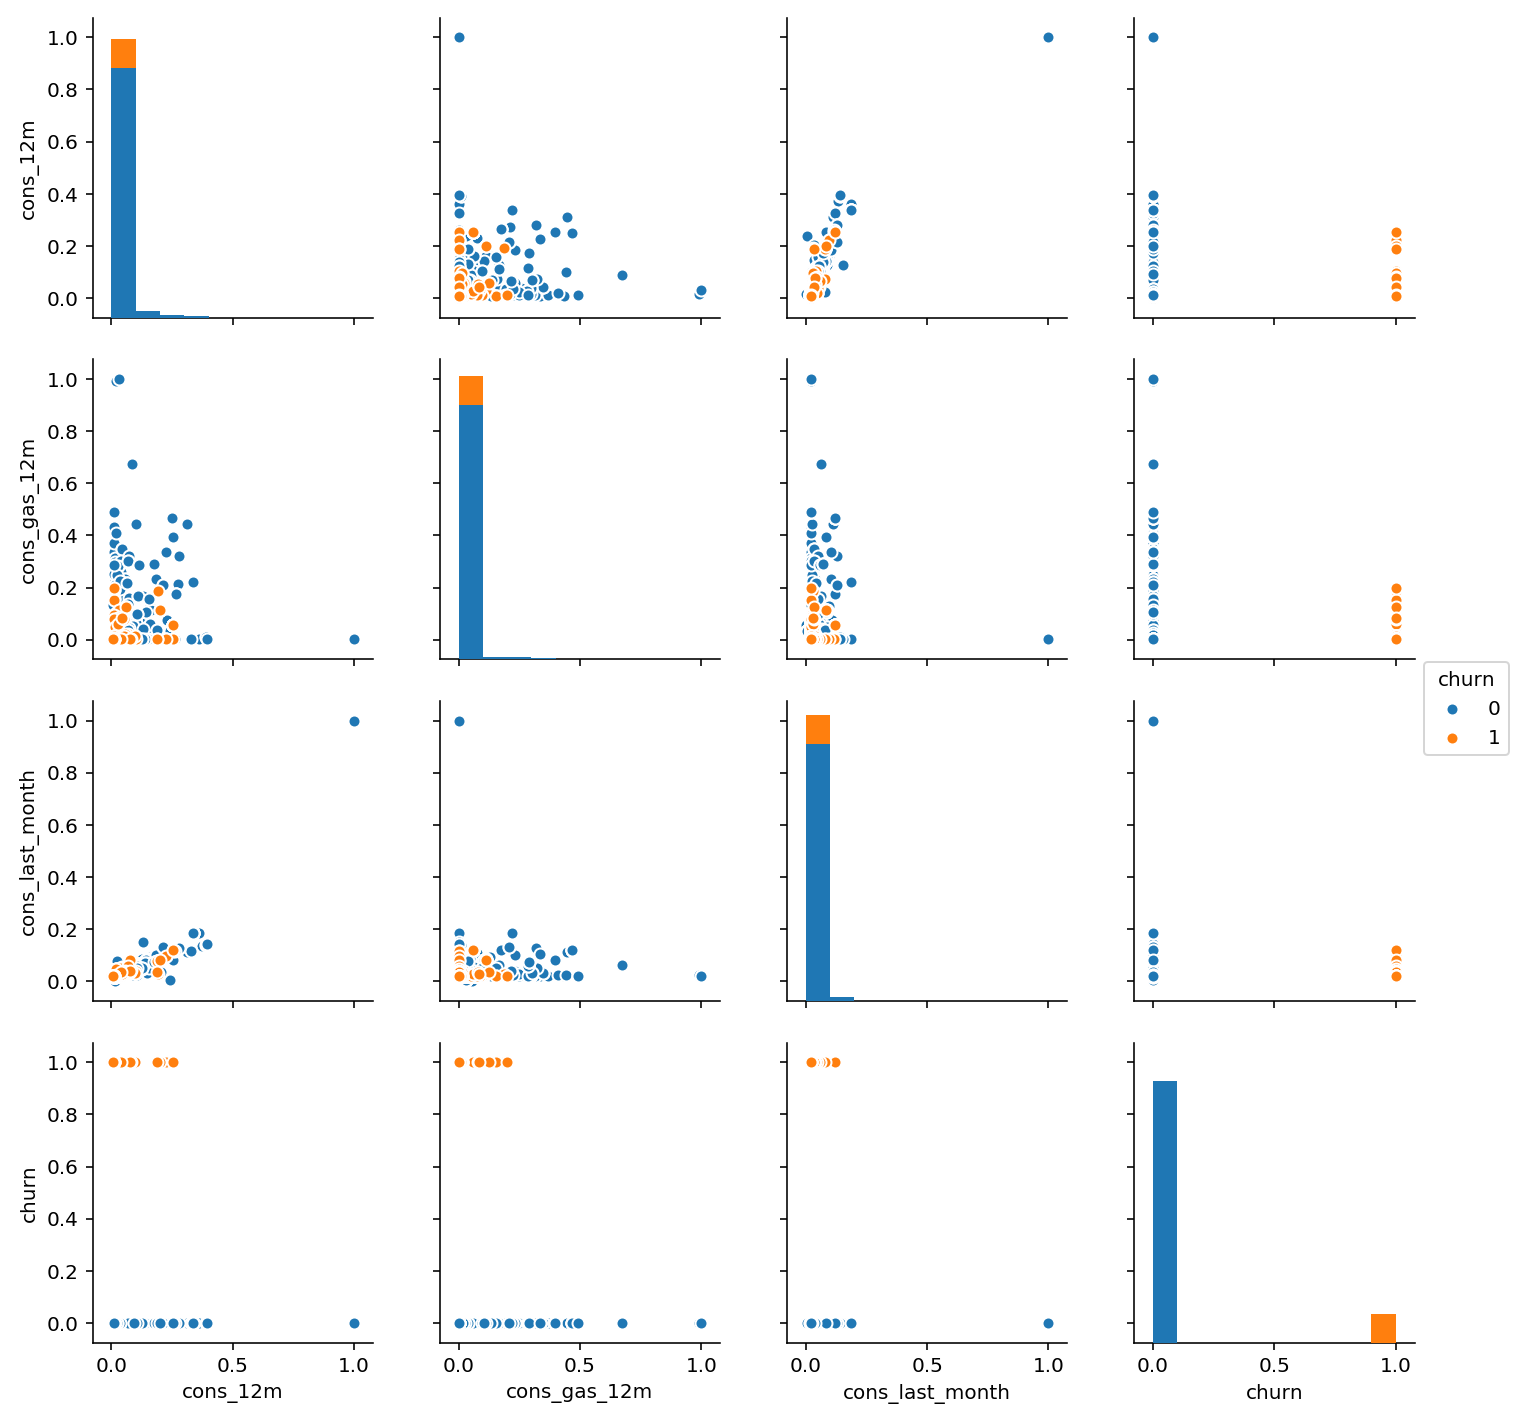

In [141]:
sns.pairplot(merged_df[['cons_12m','cons_gas_12m','cons_last_month', 'churn']].dropna(), hue='churn')
plt.show()

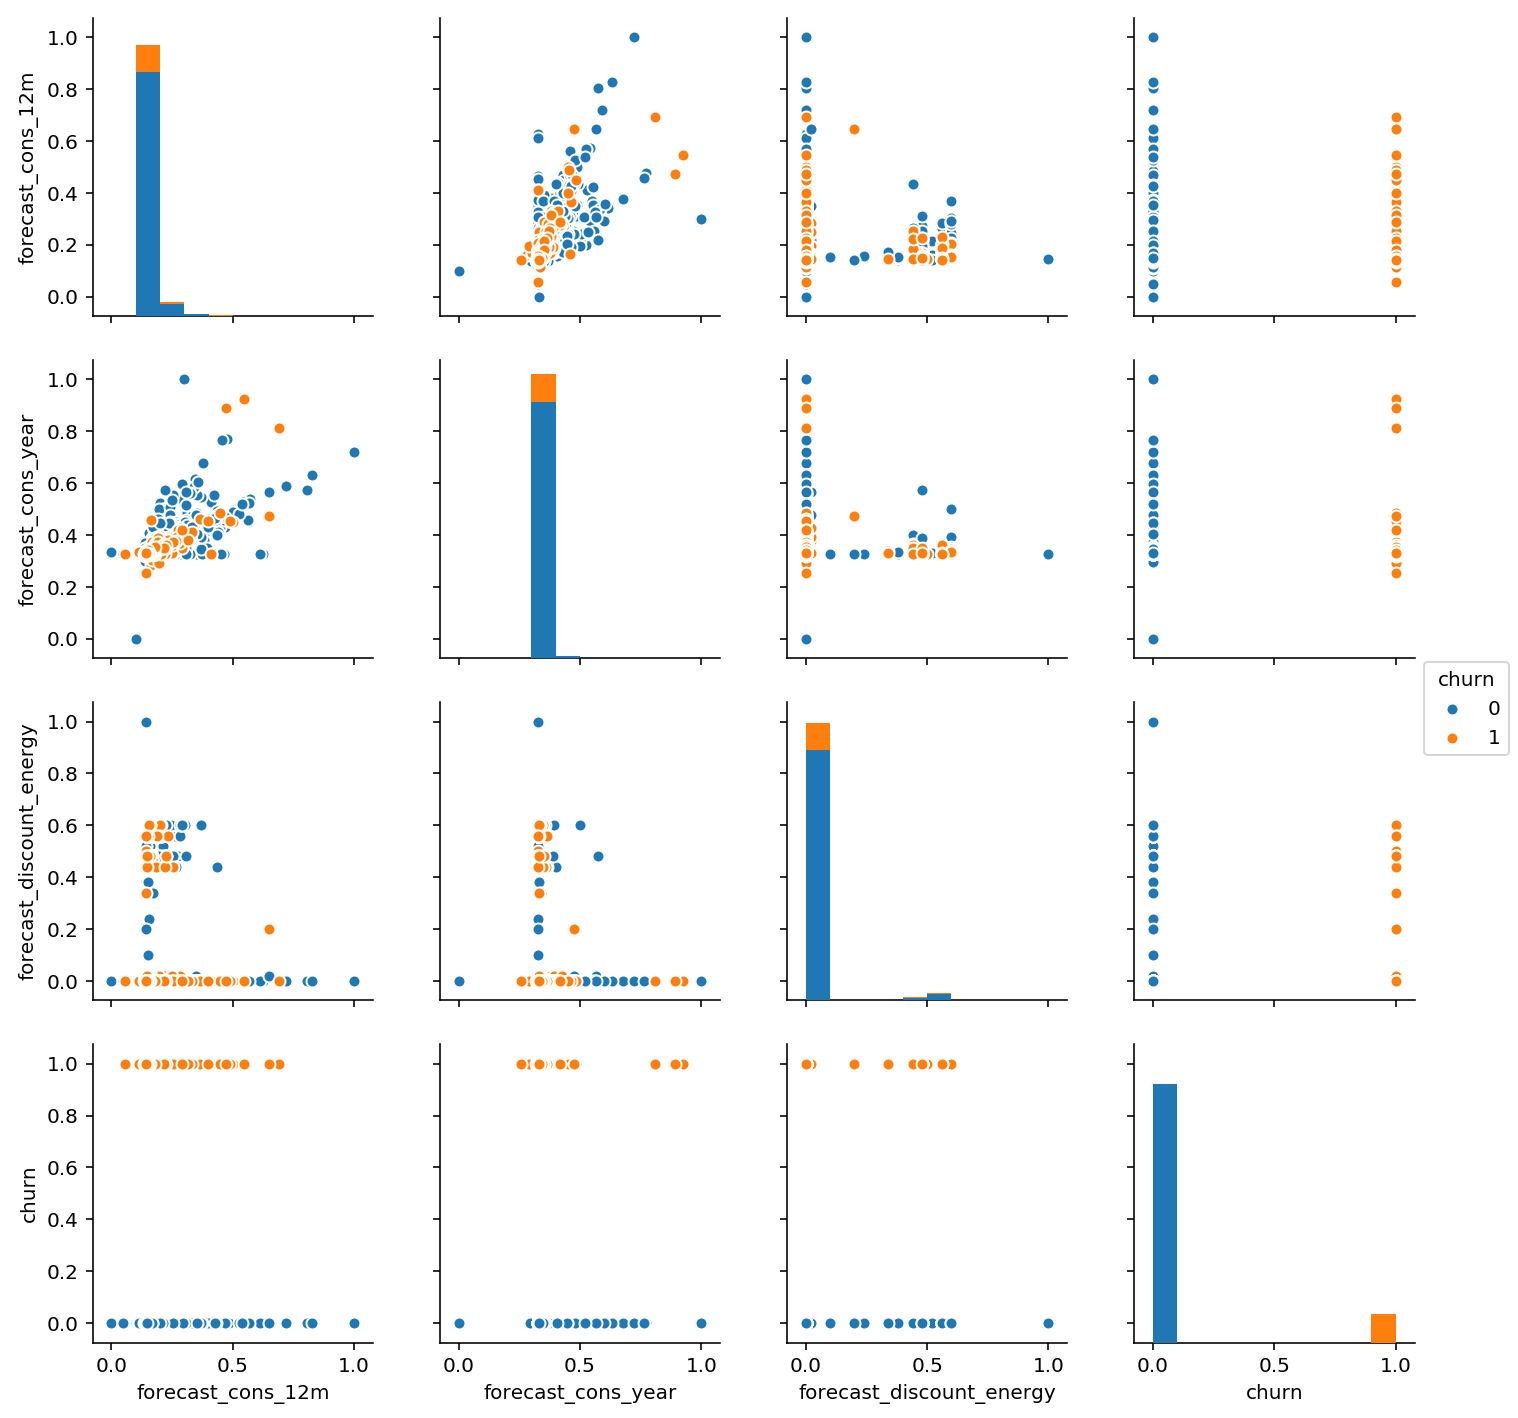

In [142]:
sns.pairplot(merged_df[['forecast_cons_12m','forecast_cons_year','forecast_discount_energy','churn']].dropna(), hue='churn')
plt.show()

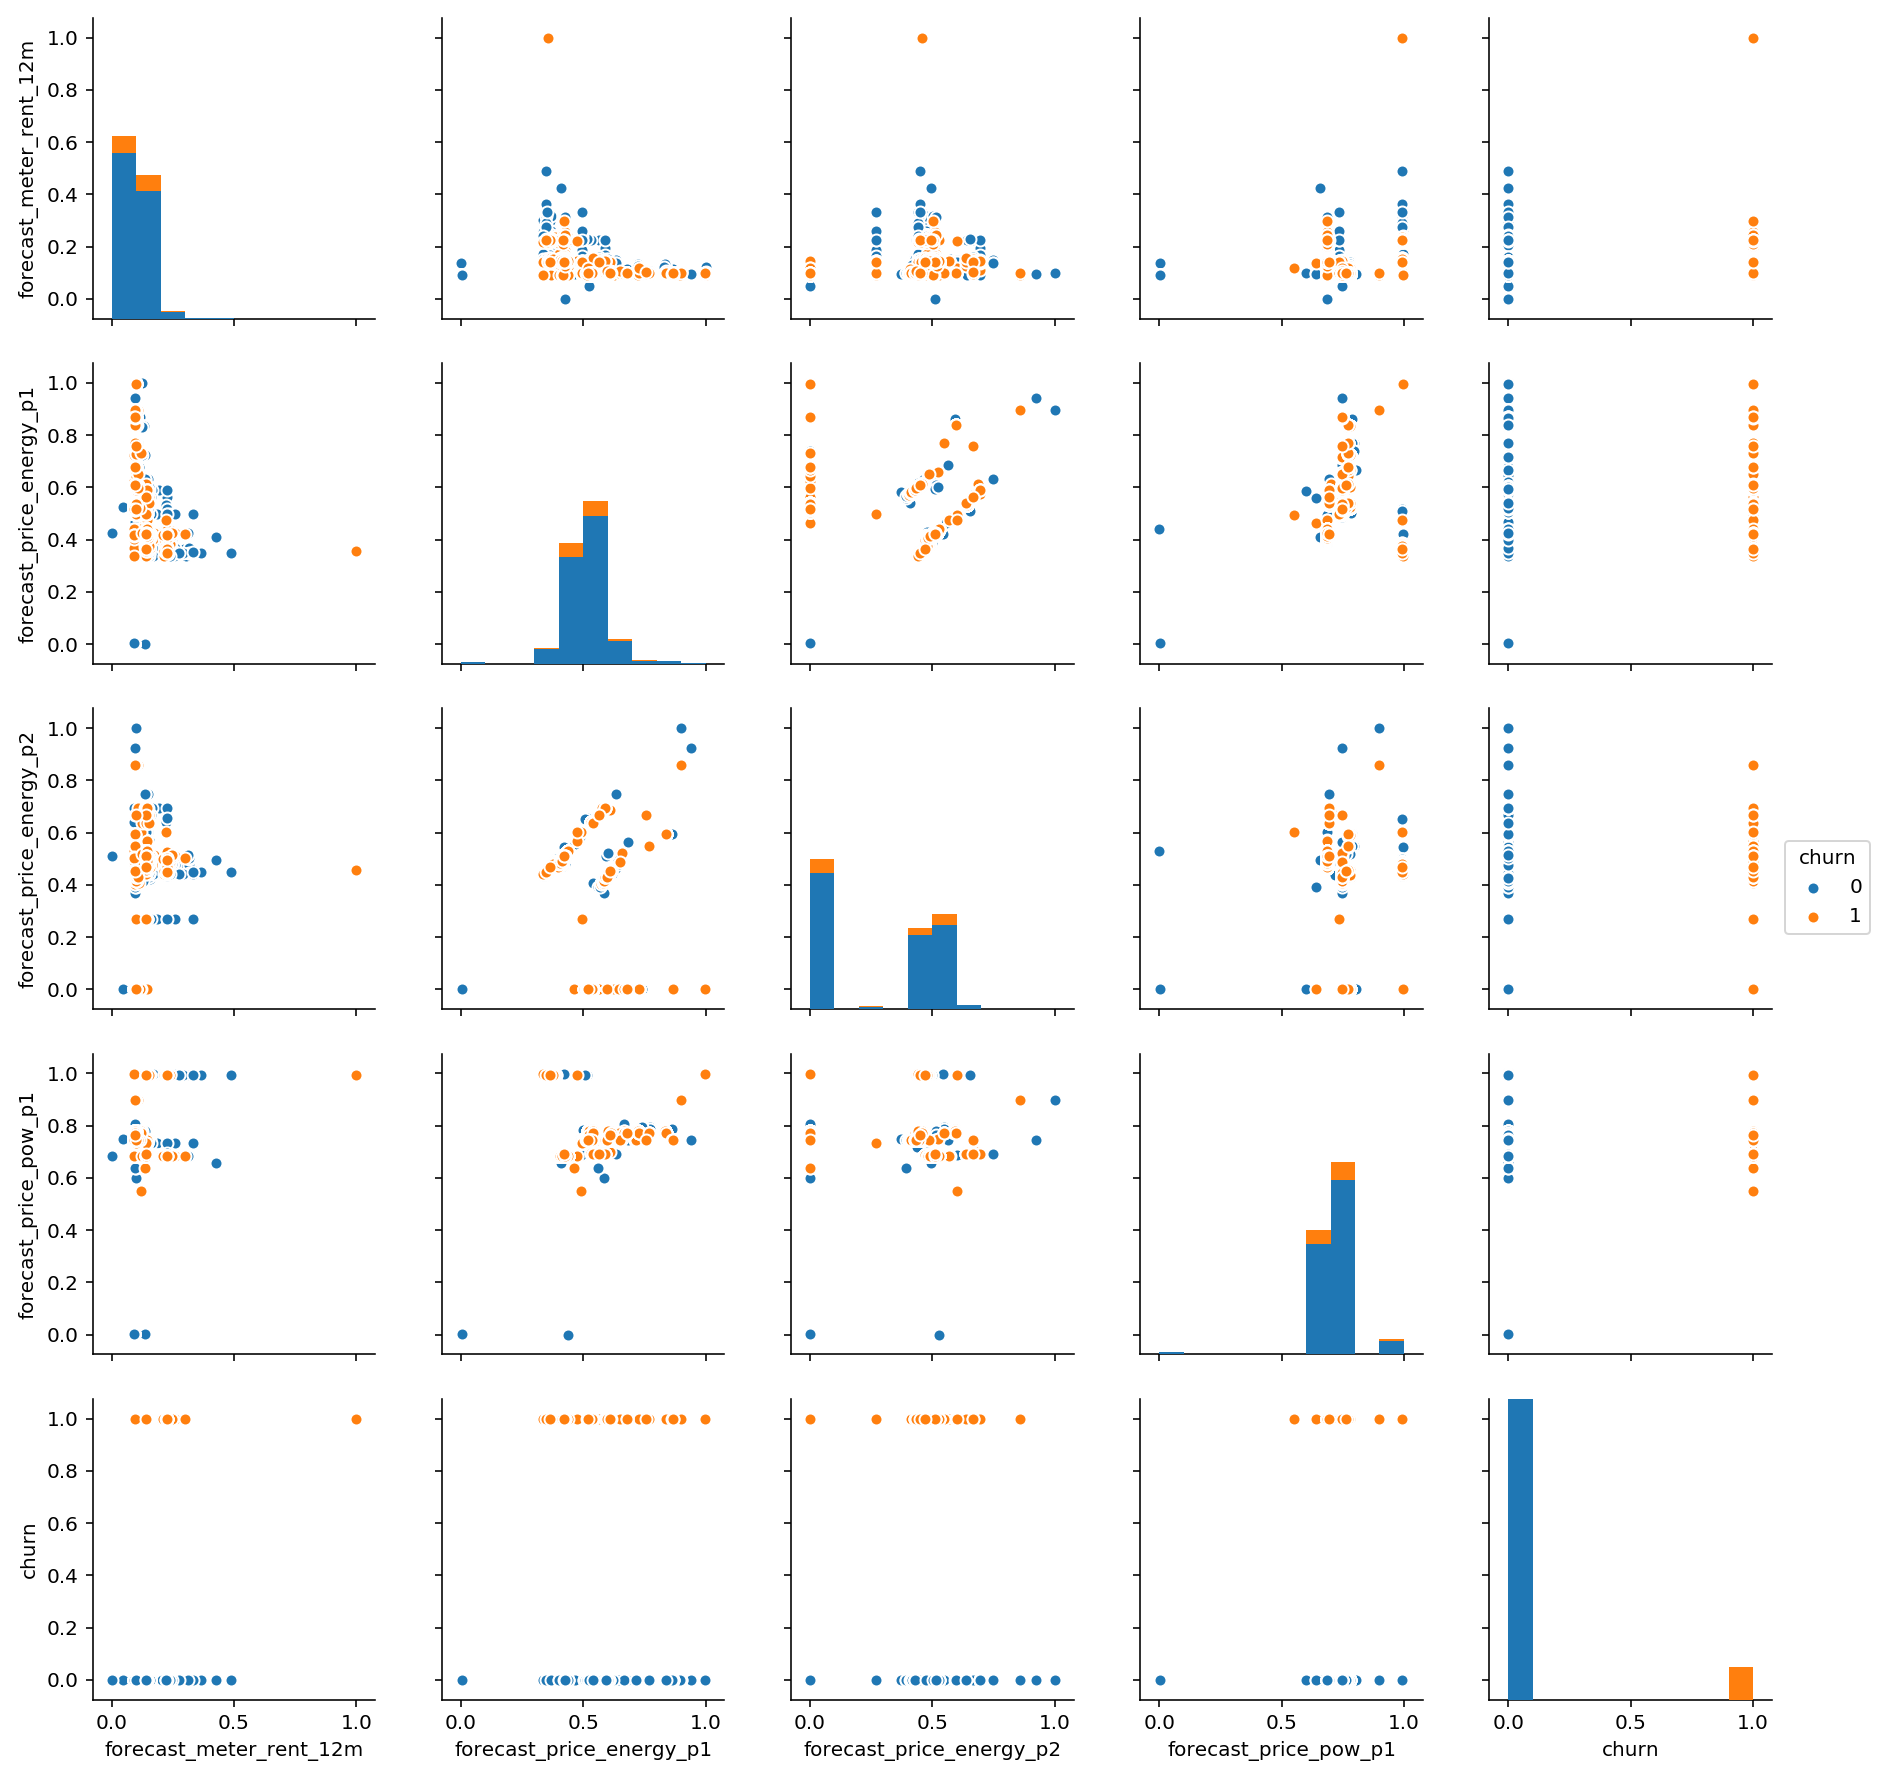

In [143]:
sns.pairplot(merged_df[['forecast_meter_rent_12m','forecast_price_energy_p1','forecast_price_energy_p2', 'forecast_price_pow_p1','churn']].dropna(), hue='churn')
plt.show()

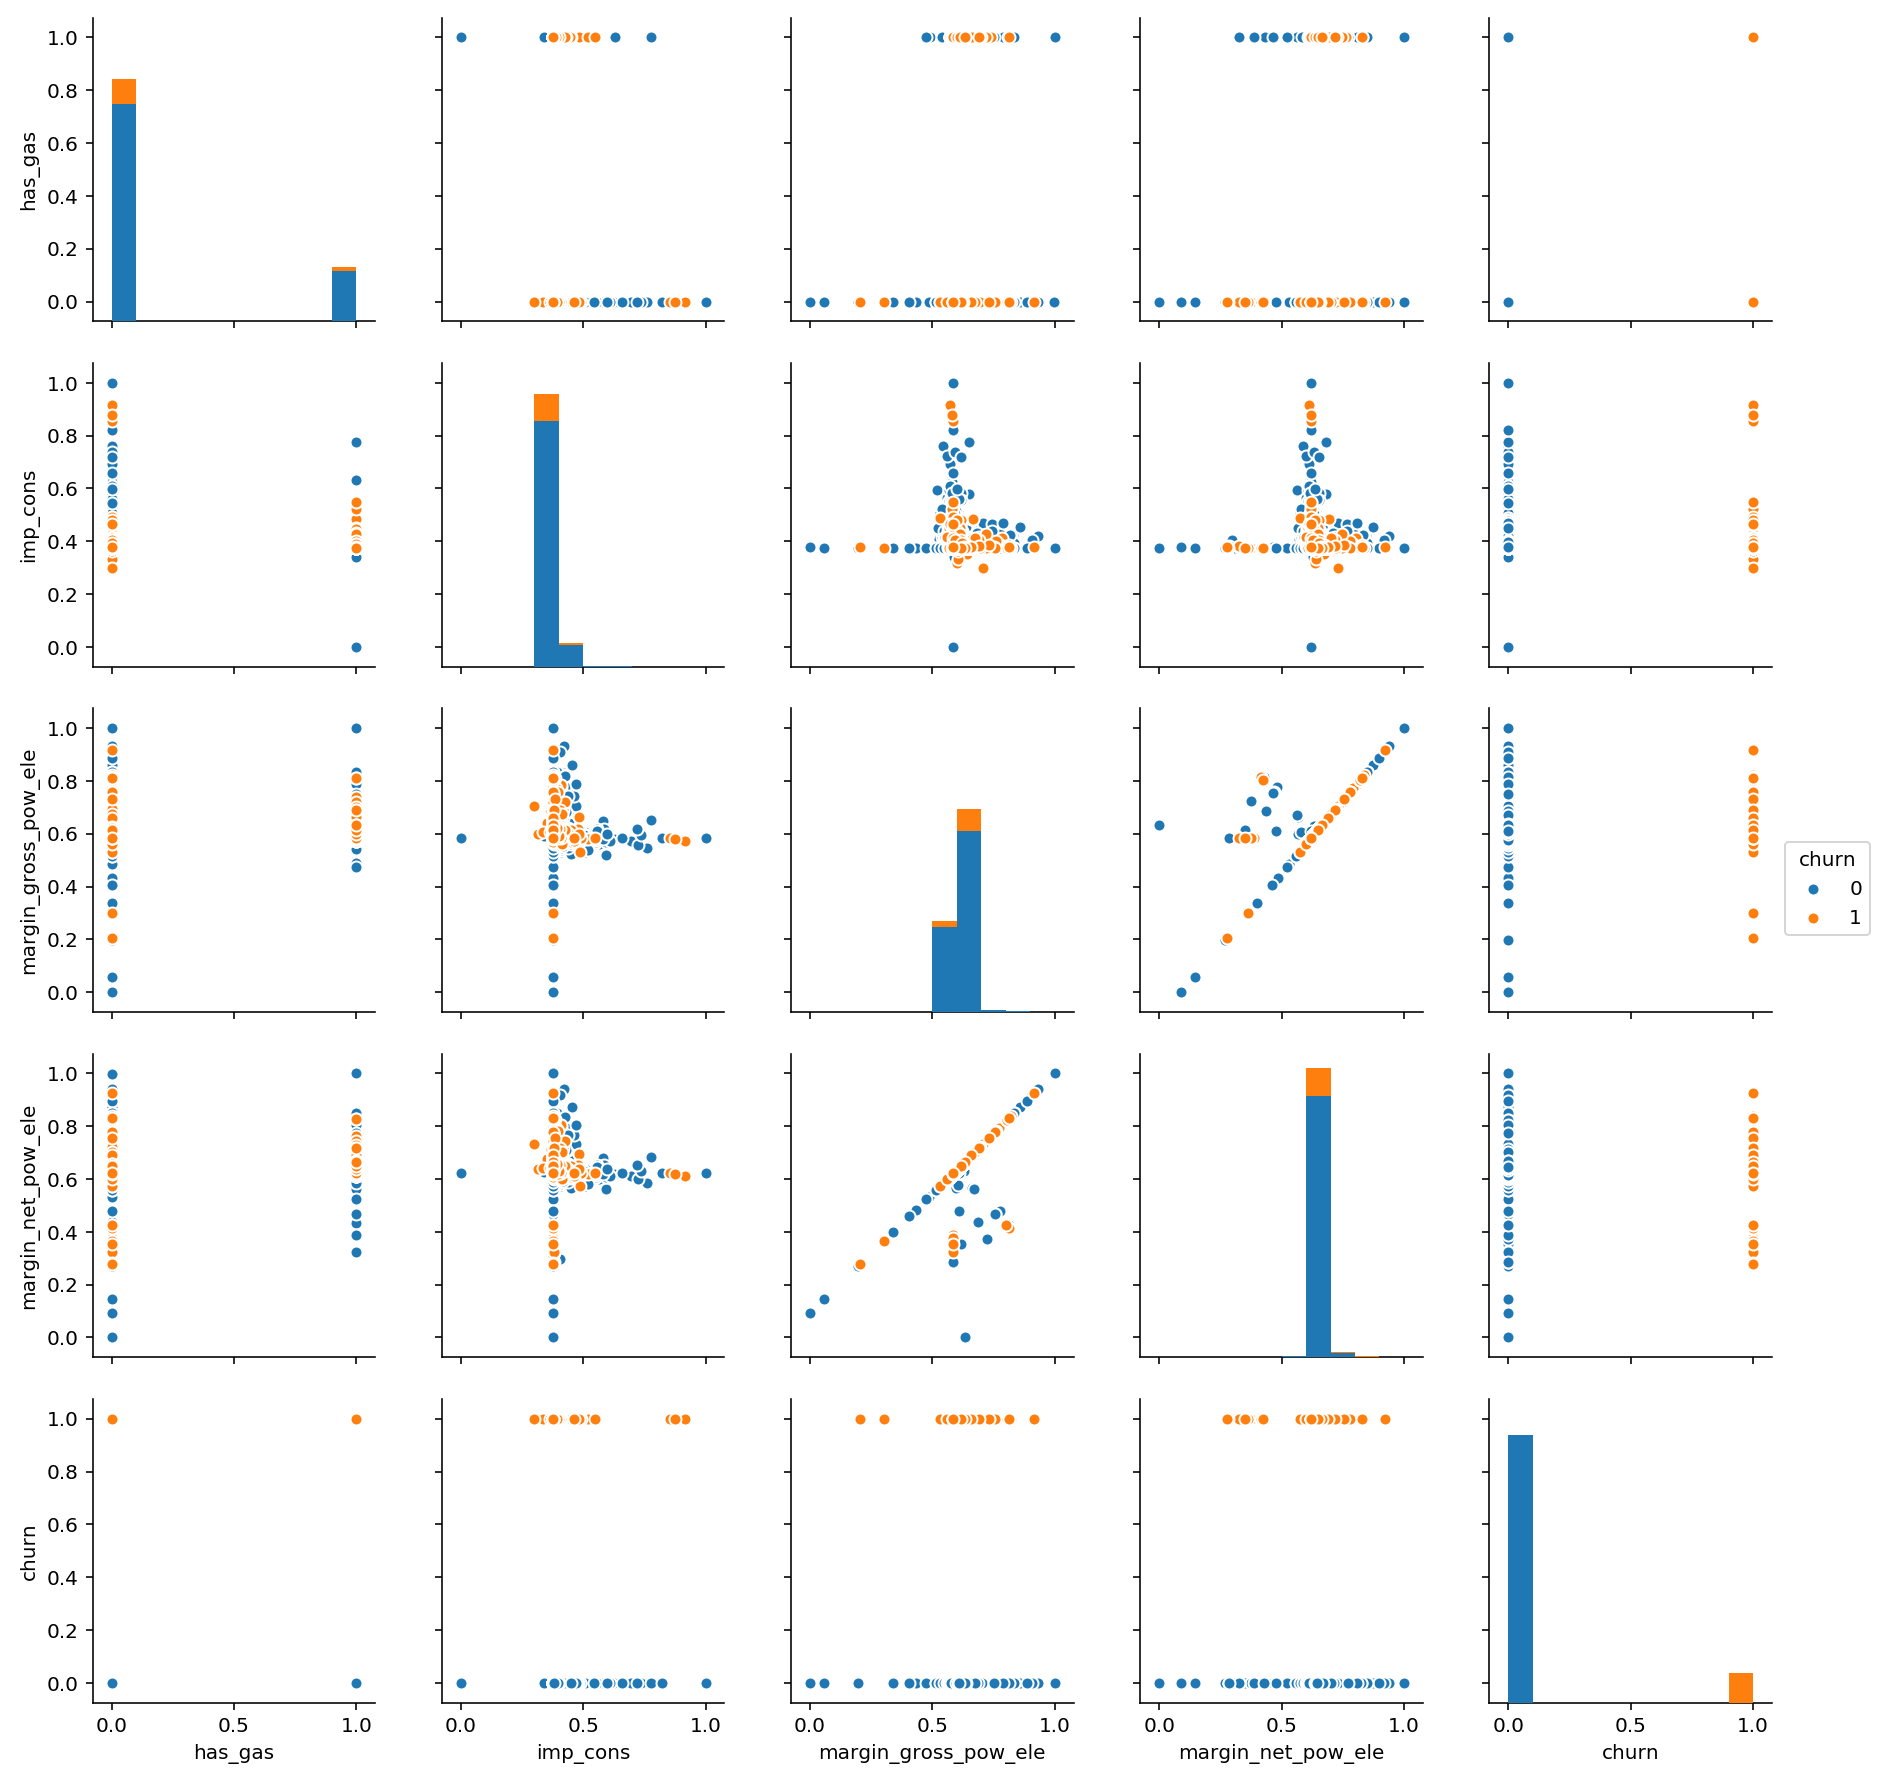

In [144]:
sns.pairplot(merged_df[['has_gas','imp_cons','margin_gross_pow_ele', 'margin_net_pow_ele','churn']].dropna(), hue='churn')
plt.show()

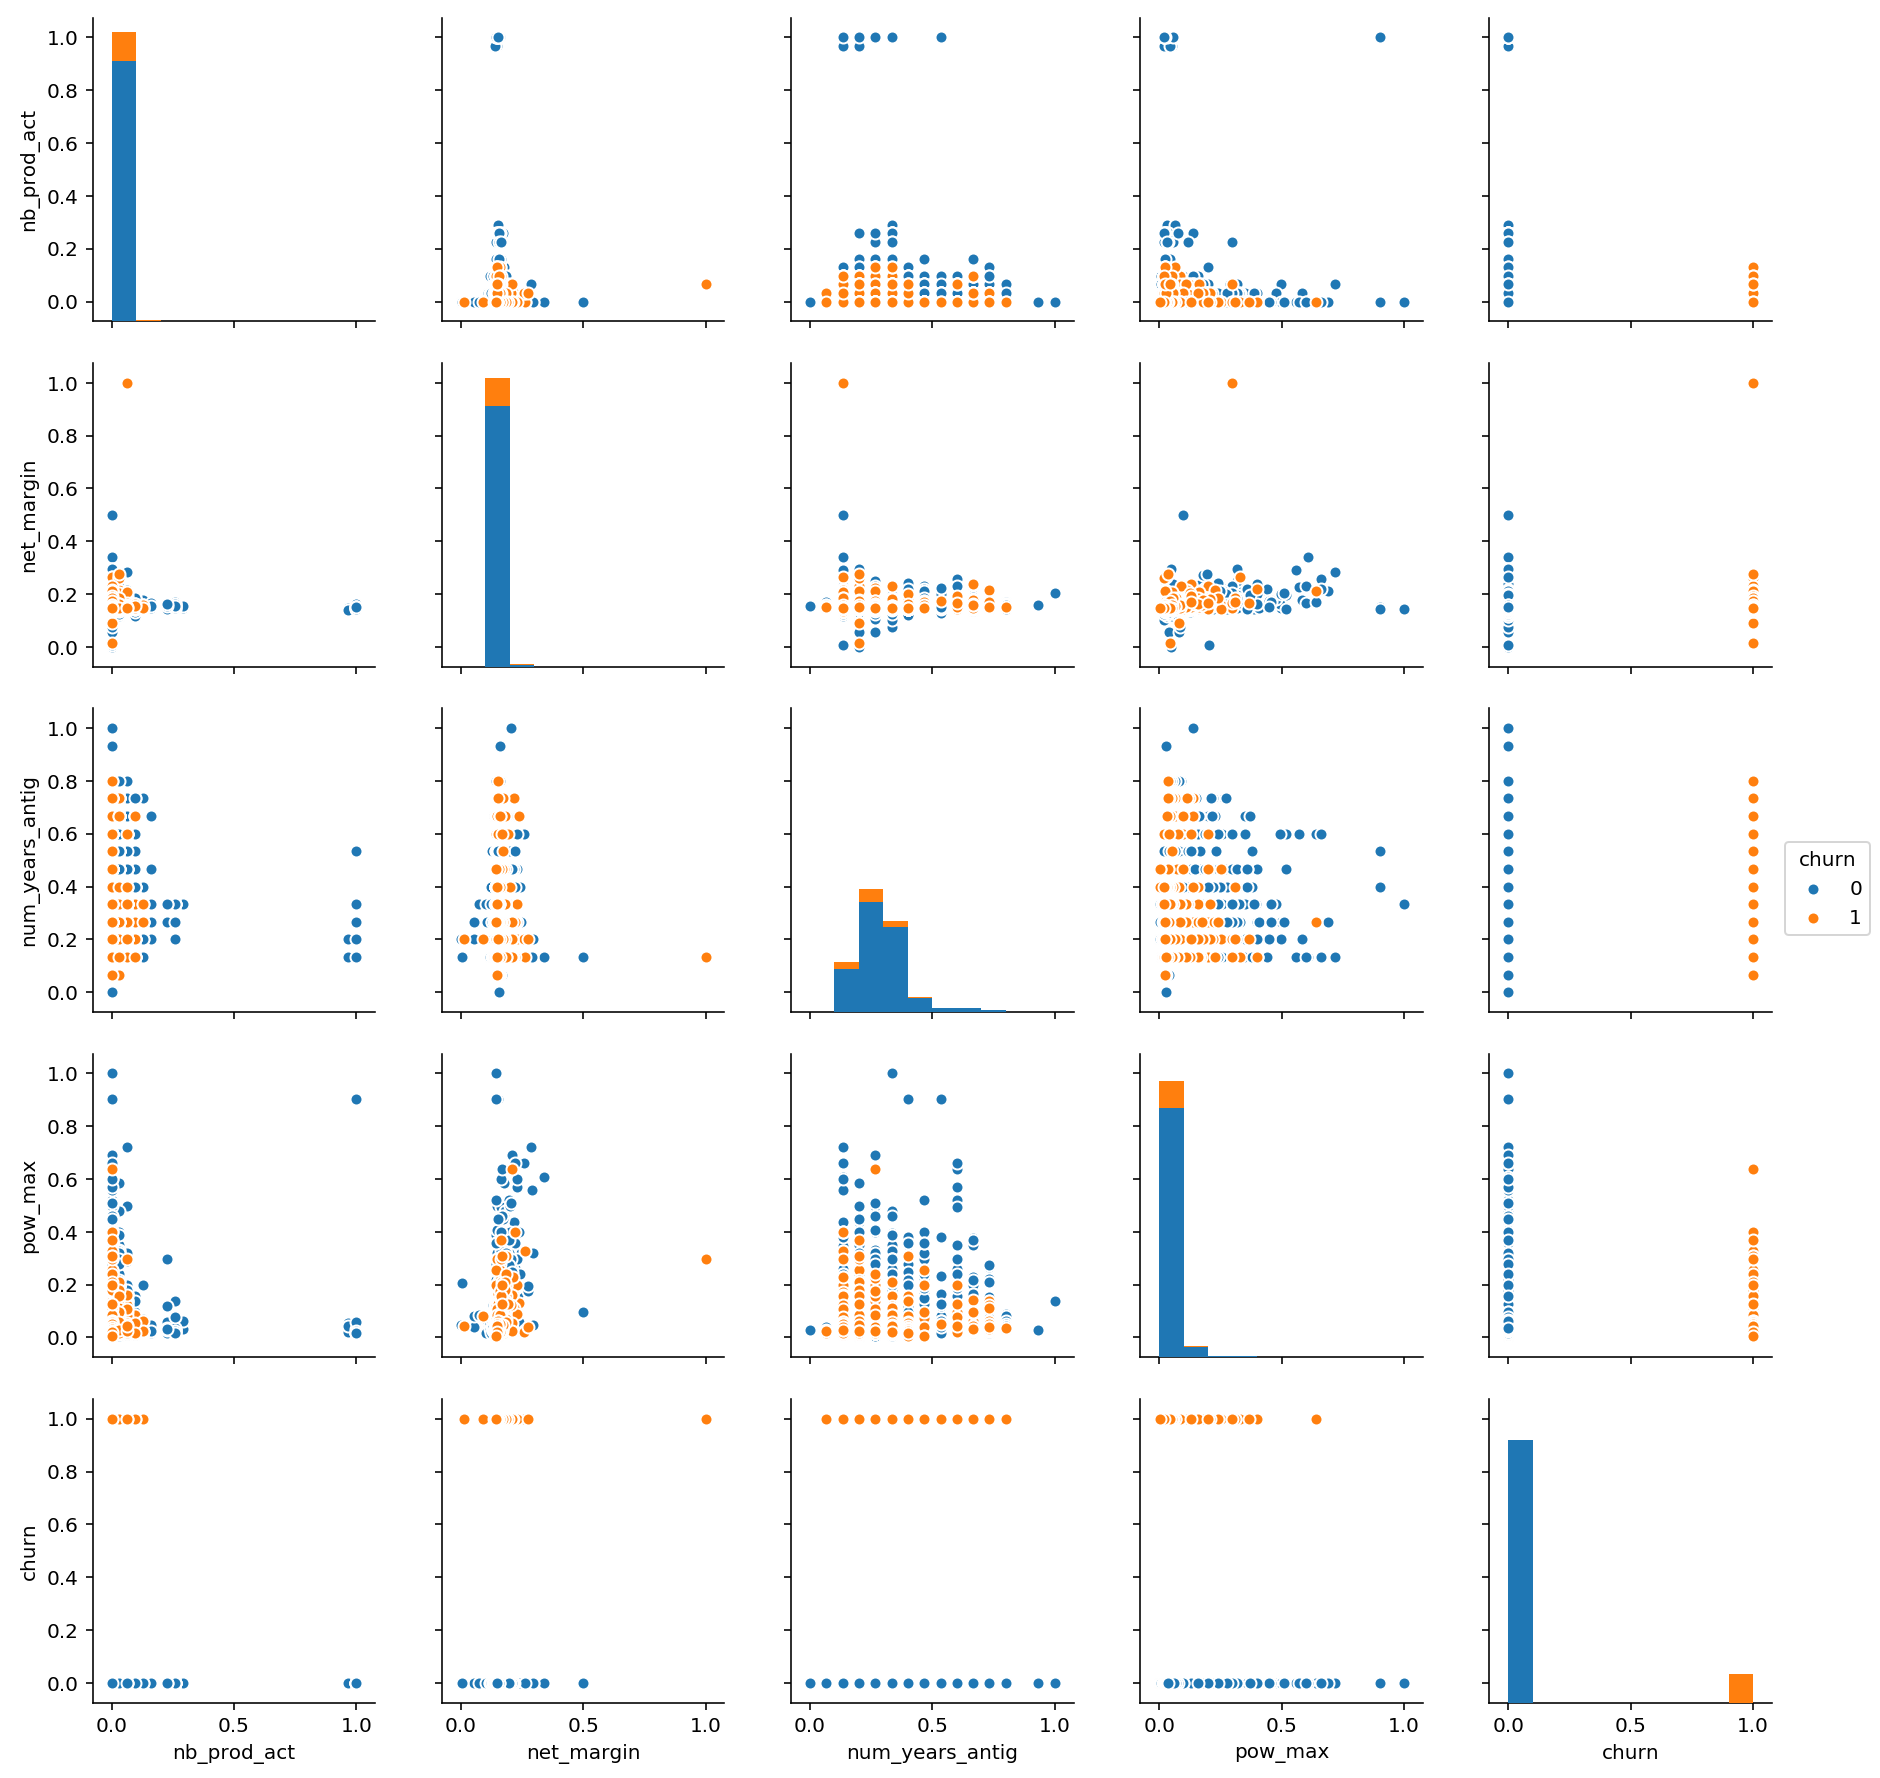

In [145]:
sns.pairplot(merged_df[['nb_prod_act','net_margin','num_years_antig', 'pow_max','churn']].dropna(), hue='churn')
plt.show()

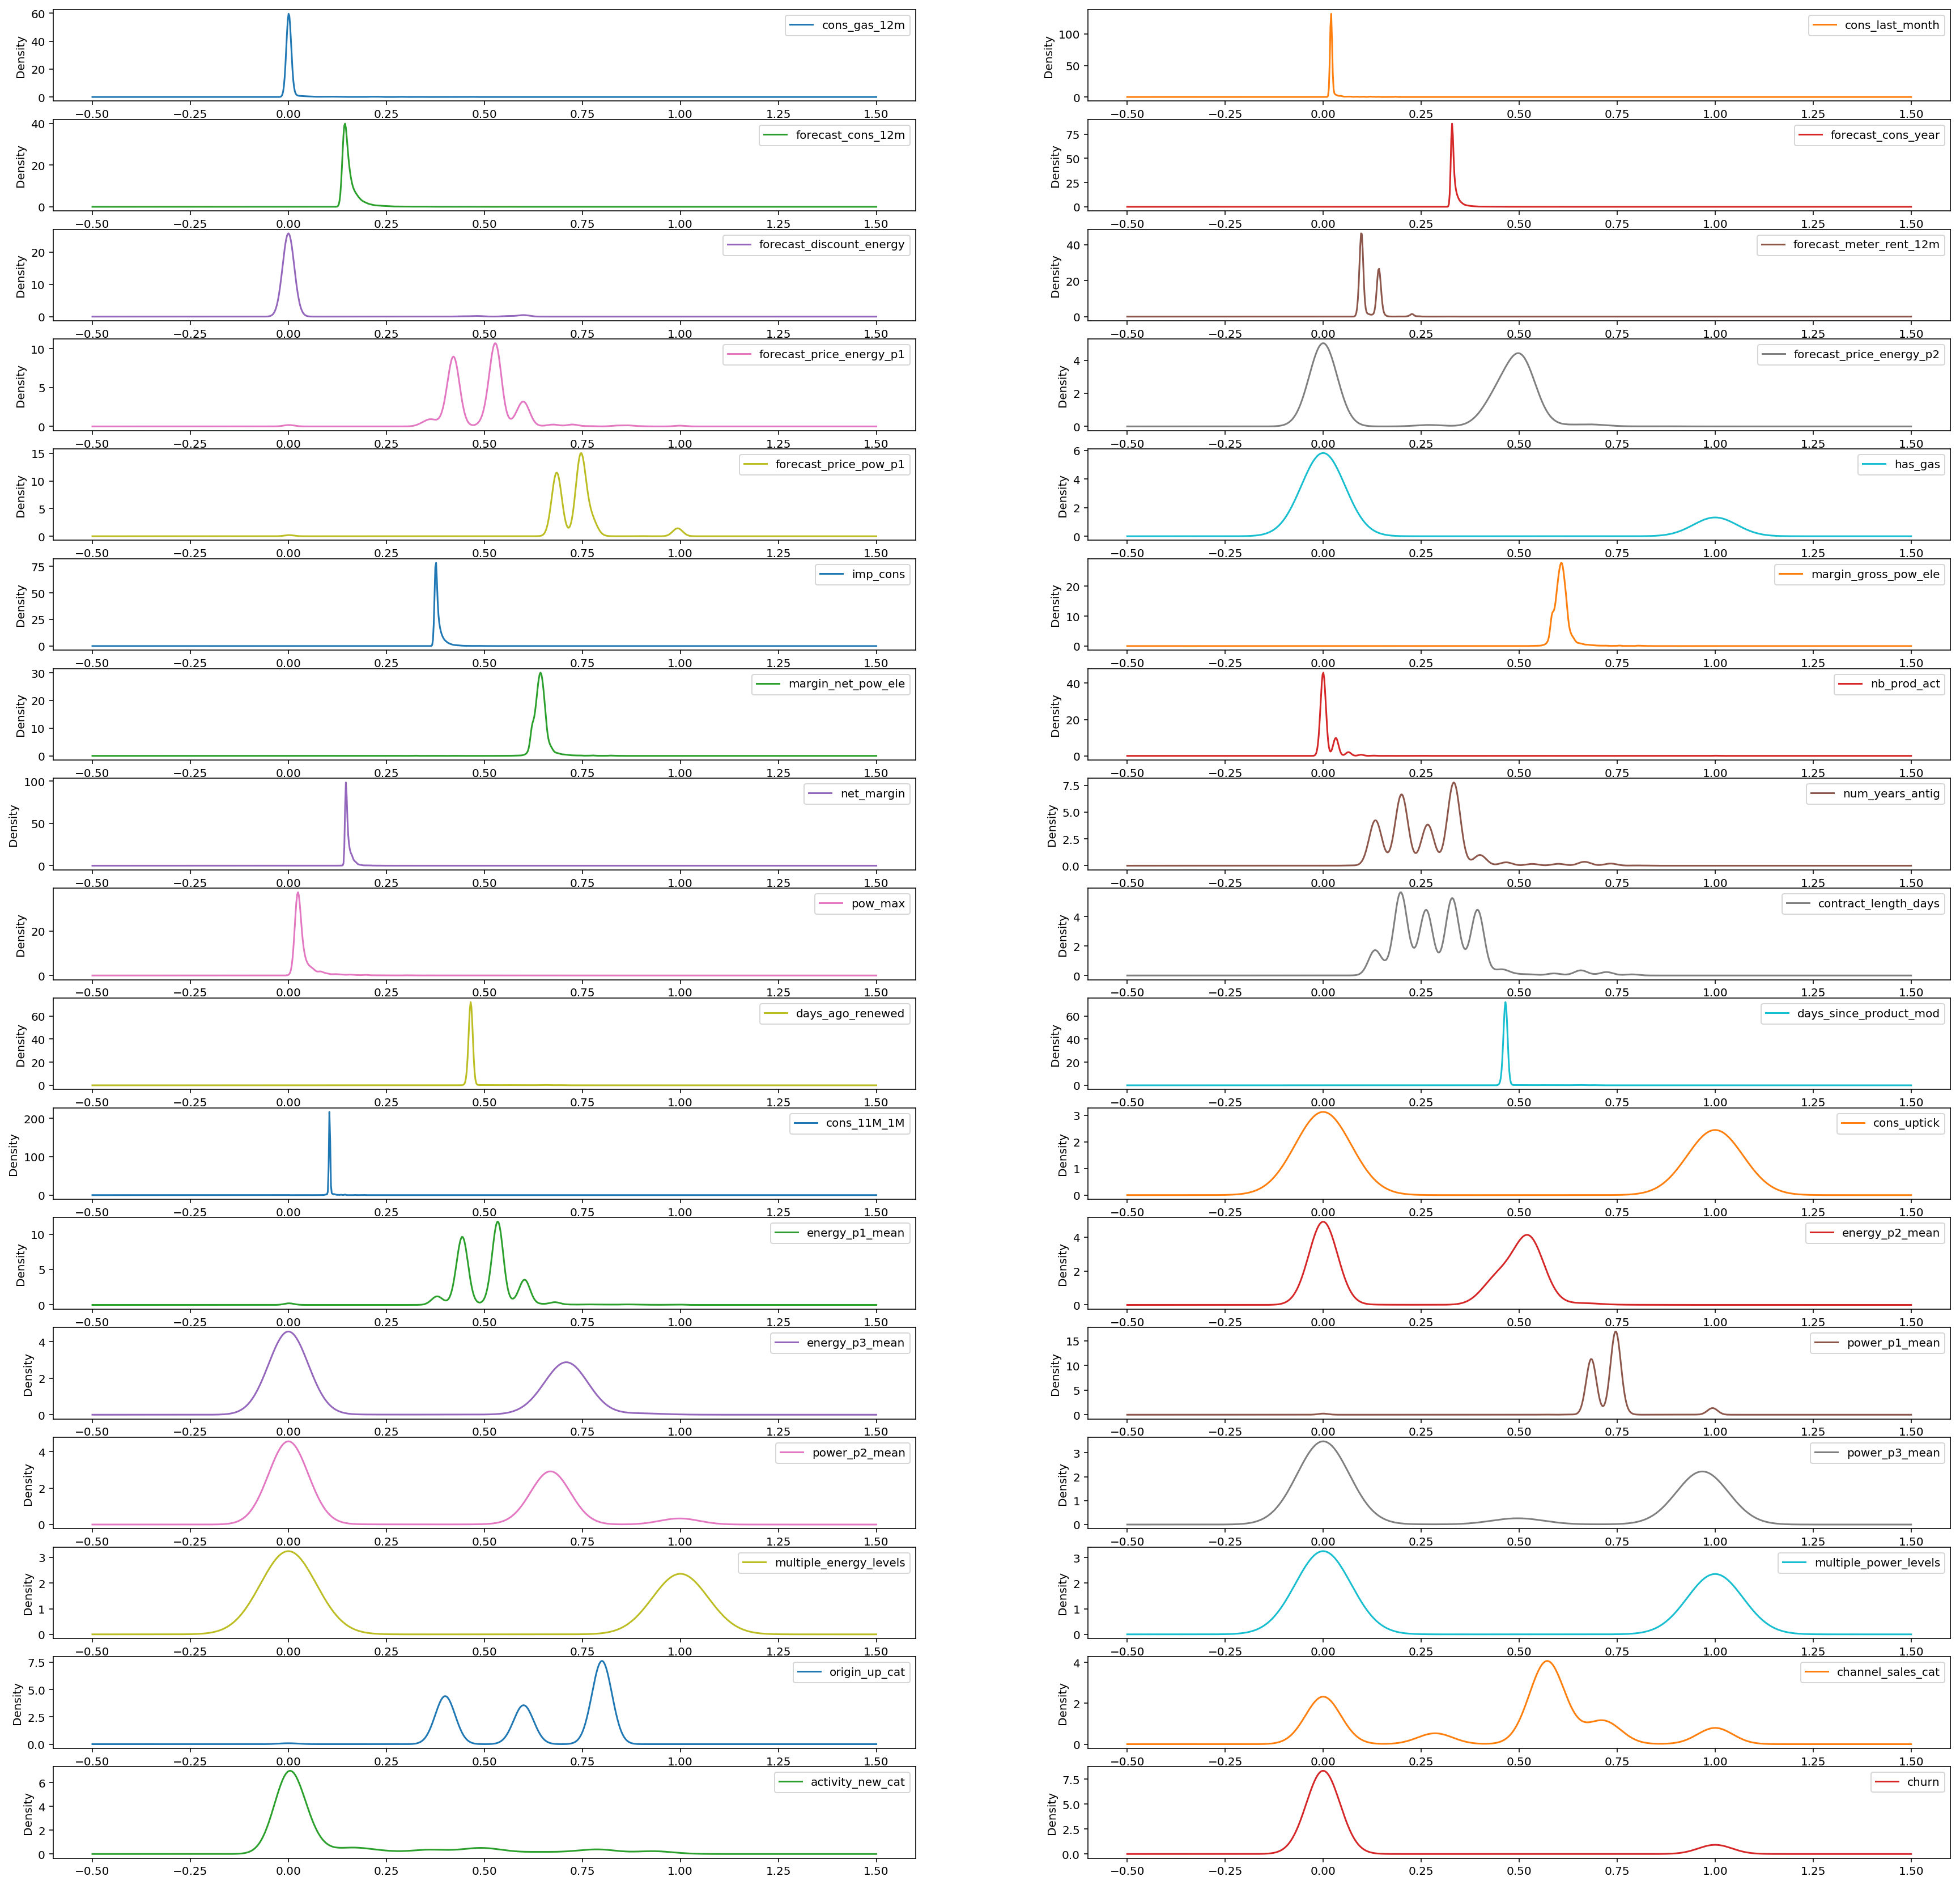

In [148]:
# Take a look at distribution of returns for all variables
df.iloc[:,1:].plot(kind='density', subplots=True, layout=(17, 2), figsize=(30,30), sharex=False, sharey=False)
None

/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1729: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


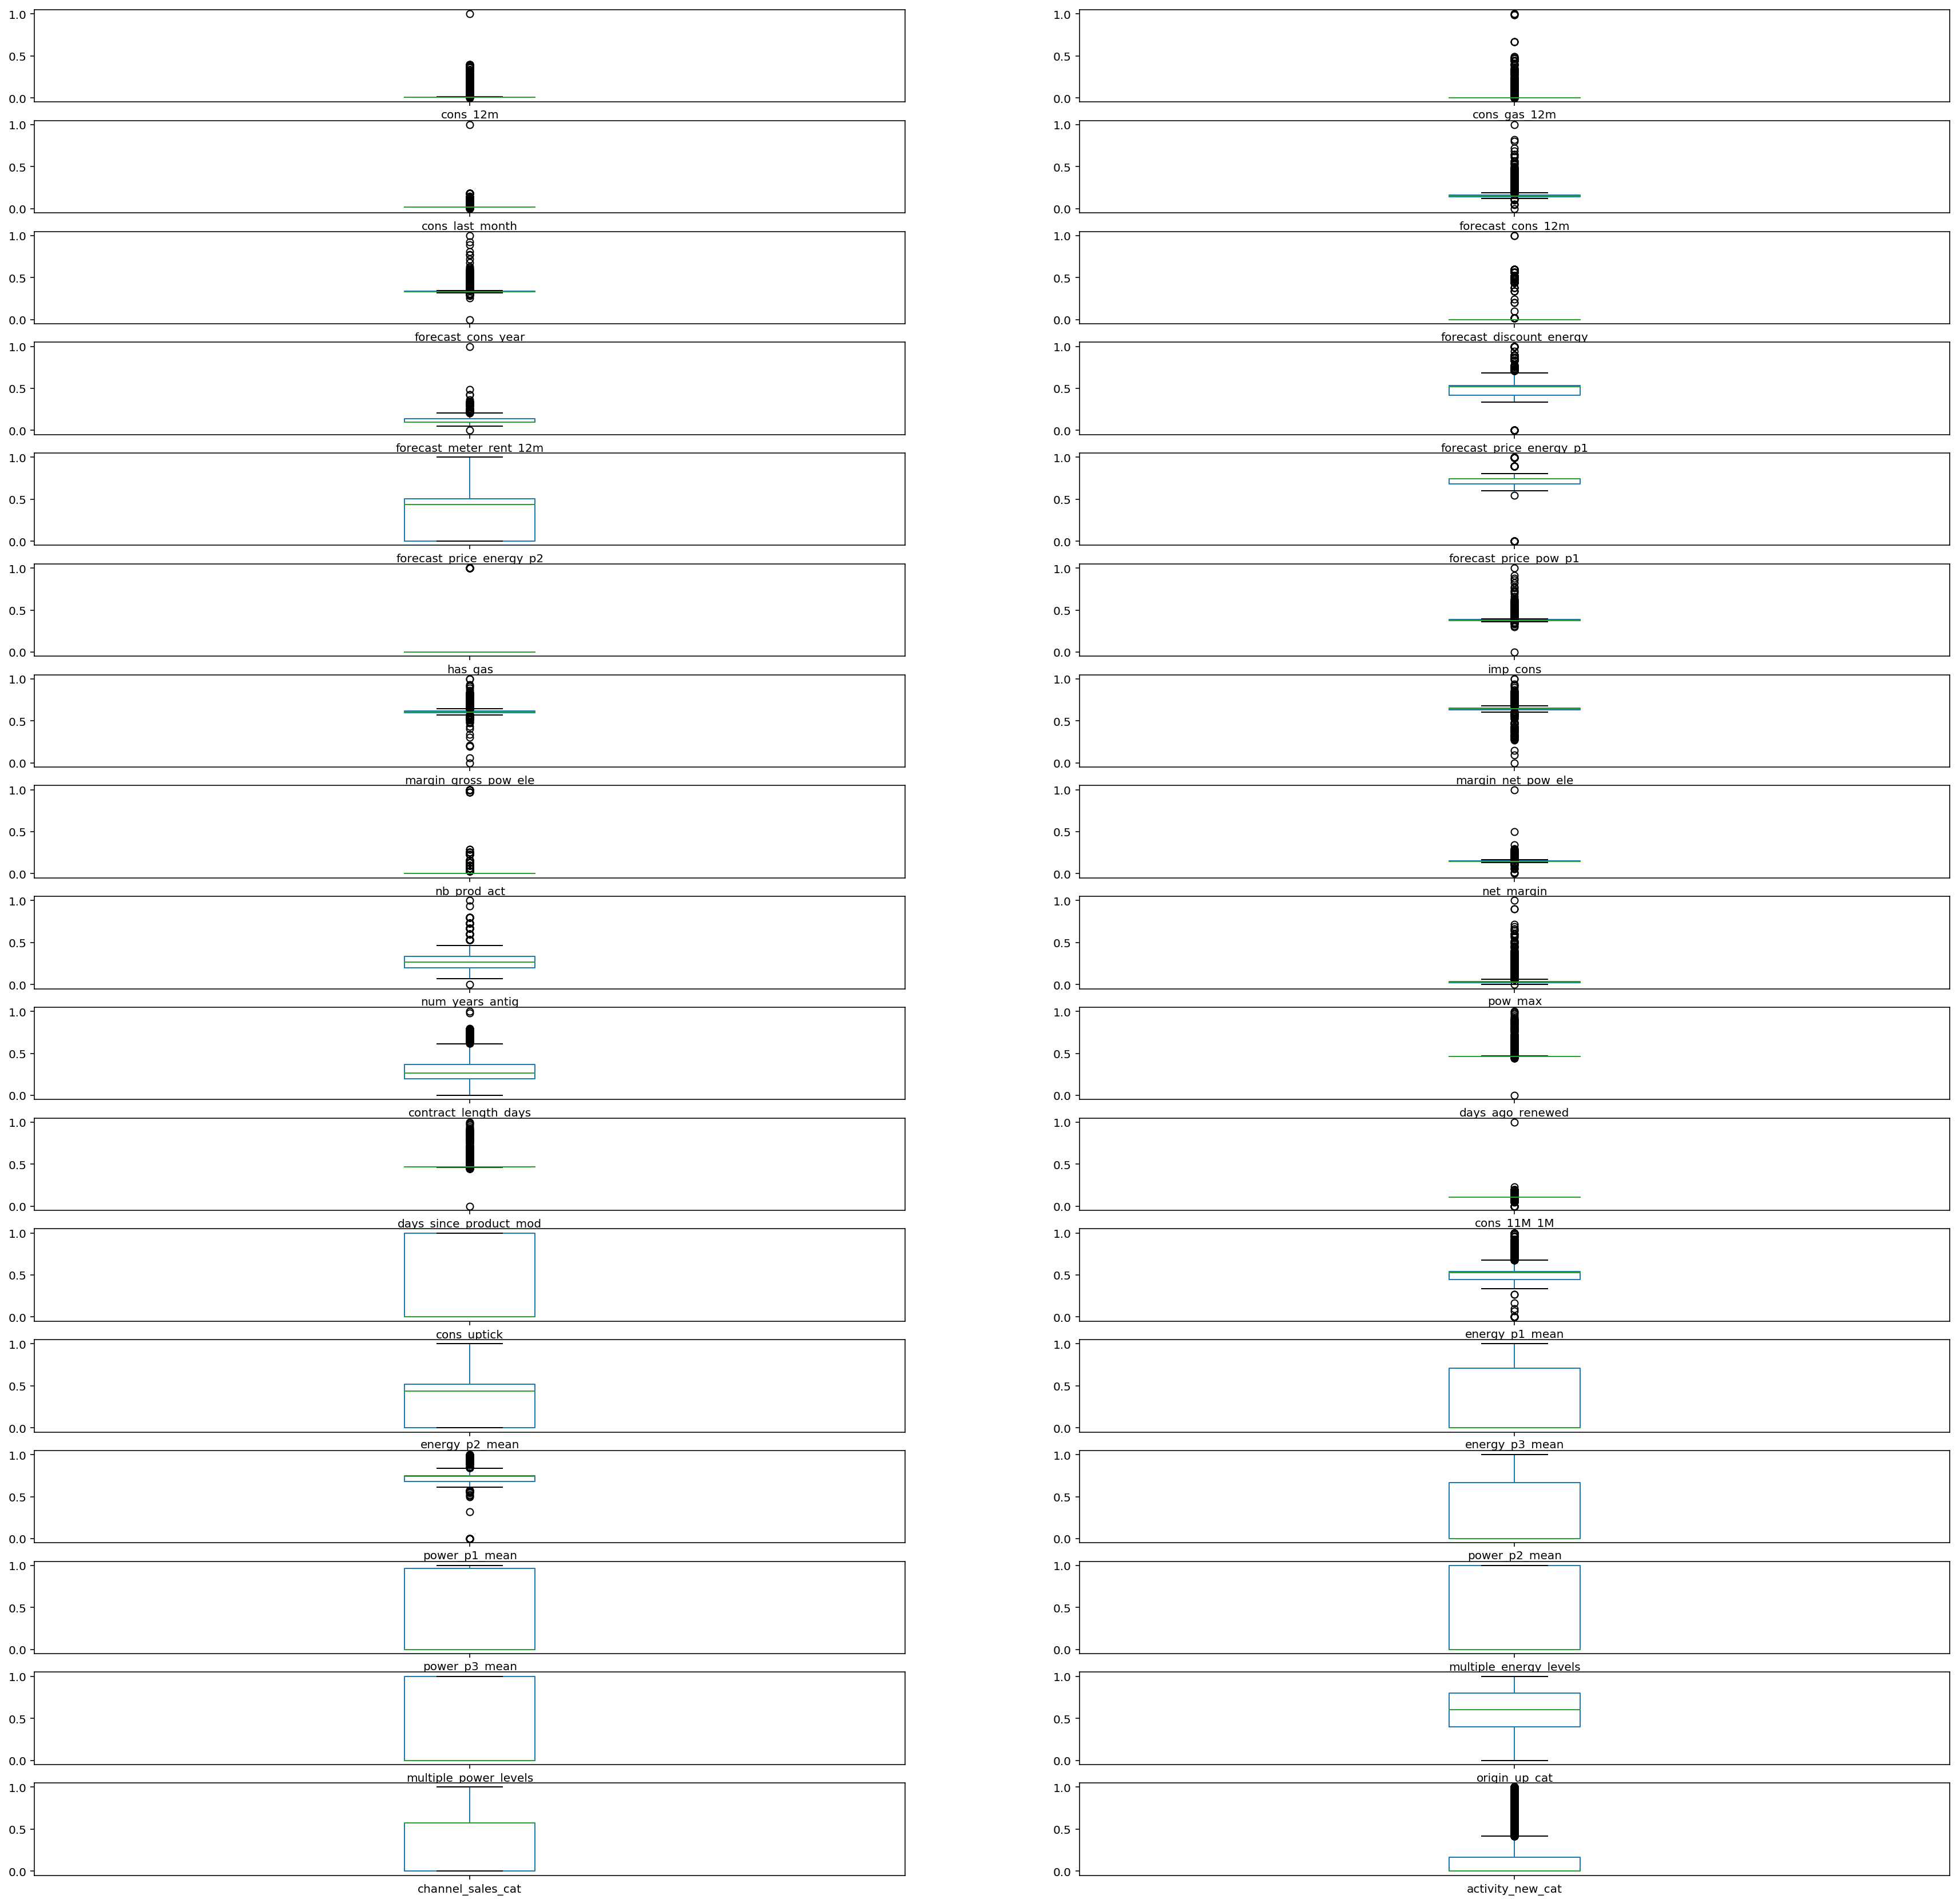

In [152]:
# Boxplot to check the distribution of numeric features
fig,ax = plt.subplots(figsize=(30,30))
df.drop(['churn'], axis=1).plot(kind='box', subplots=True, layout=(17,2), ax=ax)
None

### Clustering on Consumer Features
---

In [63]:
# Let's run this process recursively from 2 to 20 centroids and calculate the Silhouette Score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
scores = []
for i in range(2,21):
    km = KMeans(n_clusters=i)
    clusters = km.fit_predict(merged_df.fillna(0))
    score = silhouette_score(merged_df.fillna(0), clusters, metric='euclidean')
    print('With %s clusters, the Silhouette score is %s' % (i, score))
    scores.append(score)

With 2 clusters, the Silhouette score is 0.2822119383062699
With 3 clusters, the Silhouette score is 0.20661017749068192
With 4 clusters, the Silhouette score is 0.20031549445499316
With 5 clusters, the Silhouette score is 0.22122341380705868
With 6 clusters, the Silhouette score is 0.2244152282739496
With 7 clusters, the Silhouette score is 0.19936381298219205
With 8 clusters, the Silhouette score is 0.2082312466438785
With 9 clusters, the Silhouette score is 0.2110866087764483


KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(range(2,21), scores, 'b*-')
ax.set_xlabel('Number of Clusters')
ax.set_xticks(range(2,21))
ax.set_xticklabels([i for i in range(2,21)])
ax.set_ylabel('Silhouette Coefficient')
ax.set_title('Highest Silhouette Coefficient with 2 Clusters')
ax.plot(2, scores[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')
None

In [64]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(merged_df.fillna(0))
# fit_predict = gives us cluster numbers
# fit_transform = gives us centroids
clusters

array([1, 0, 0, ..., 1, 1, 1], dtype=int32)

### Create Target and Feature DataFrames
---

In [57]:
X = merged_df.drop(['churn'], axis=1).fillna(0)
#X['cluster'] = clusters.tolist()
X.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels,origin_up_cat,channel_sales_cat,activity_new_cat
0002203ffbb812588b632b9e628cc38d,0.009081,0.000725,0.020403,0.144561,0.329699,0.0,0.143865,0.426700,0.510346,0.683750,0.0,0.377019,0.631674,0.665192,0.000000,0.147300,0.333333,0.032565,0.334353,0.463430,0.463430,0.105463,1.0,0.446043,0.528818,0.710629,0.684699,0.669240,0.967999,1.0,1.0,0.4,0.571429,0.000000
0004351ebdd665e6ee664792efc4fd13,0.007973,0.000725,0.019737,0.143471,0.328070,0.0,0.094099,0.518555,0.000000,0.745944,0.0,0.375325,0.610944,0.646350,0.000000,0.146609,0.333333,0.024449,0.385971,0.465322,0.465322,0.105019,0.0,0.525280,0.000000,0.000000,0.746668,0.000000,0.000000,0.0,0.0,0.4,0.000000,0.000000
0010bcc39e42b3c2131ed2ce55246e3c,0.008181,0.000725,0.019967,0.149392,0.332139,0.6,0.098442,0.727215,0.000000,0.771050,0.0,0.384202,0.626675,0.660648,0.032258,0.147307,0.133333,0.025764,0.143885,0.509458,0.509458,0.105237,1.0,0.651310,0.000000,0.000000,0.762384,0.000000,0.000000,0.0,0.0,0.8,1.000000,0.362768
0010ee3855fdea87602a5b7aba8e42de,0.266593,0.174604,0.118323,0.236246,0.394710,0.0,0.141288,0.401817,0.478357,0.683750,1.0,0.438988,0.580706,0.618863,0.032258,0.175701,0.333333,0.064128,0.328597,0.462169,0.462169,0.134923,1.0,0.426021,0.500789,0.670529,0.683785,0.668347,0.966707,1.0,1.0,0.4,0.714286,0.042959
00114d74e963e47177db89bc70108537,0.008417,0.000725,0.019737,0.152382,0.328070,0.0,0.098405,0.526162,0.000000,0.745944,0.0,0.375325,0.616877,0.651742,0.000000,0.149966,0.333333,0.024449,0.328597,0.462169,0.462169,0.104851,0.0,0.530659,0.000000,0.000000,0.744674,0.000000,0.000000,0.0,0.0,0.4,0.285714,0.809069


In [58]:
y = merged_df.churn

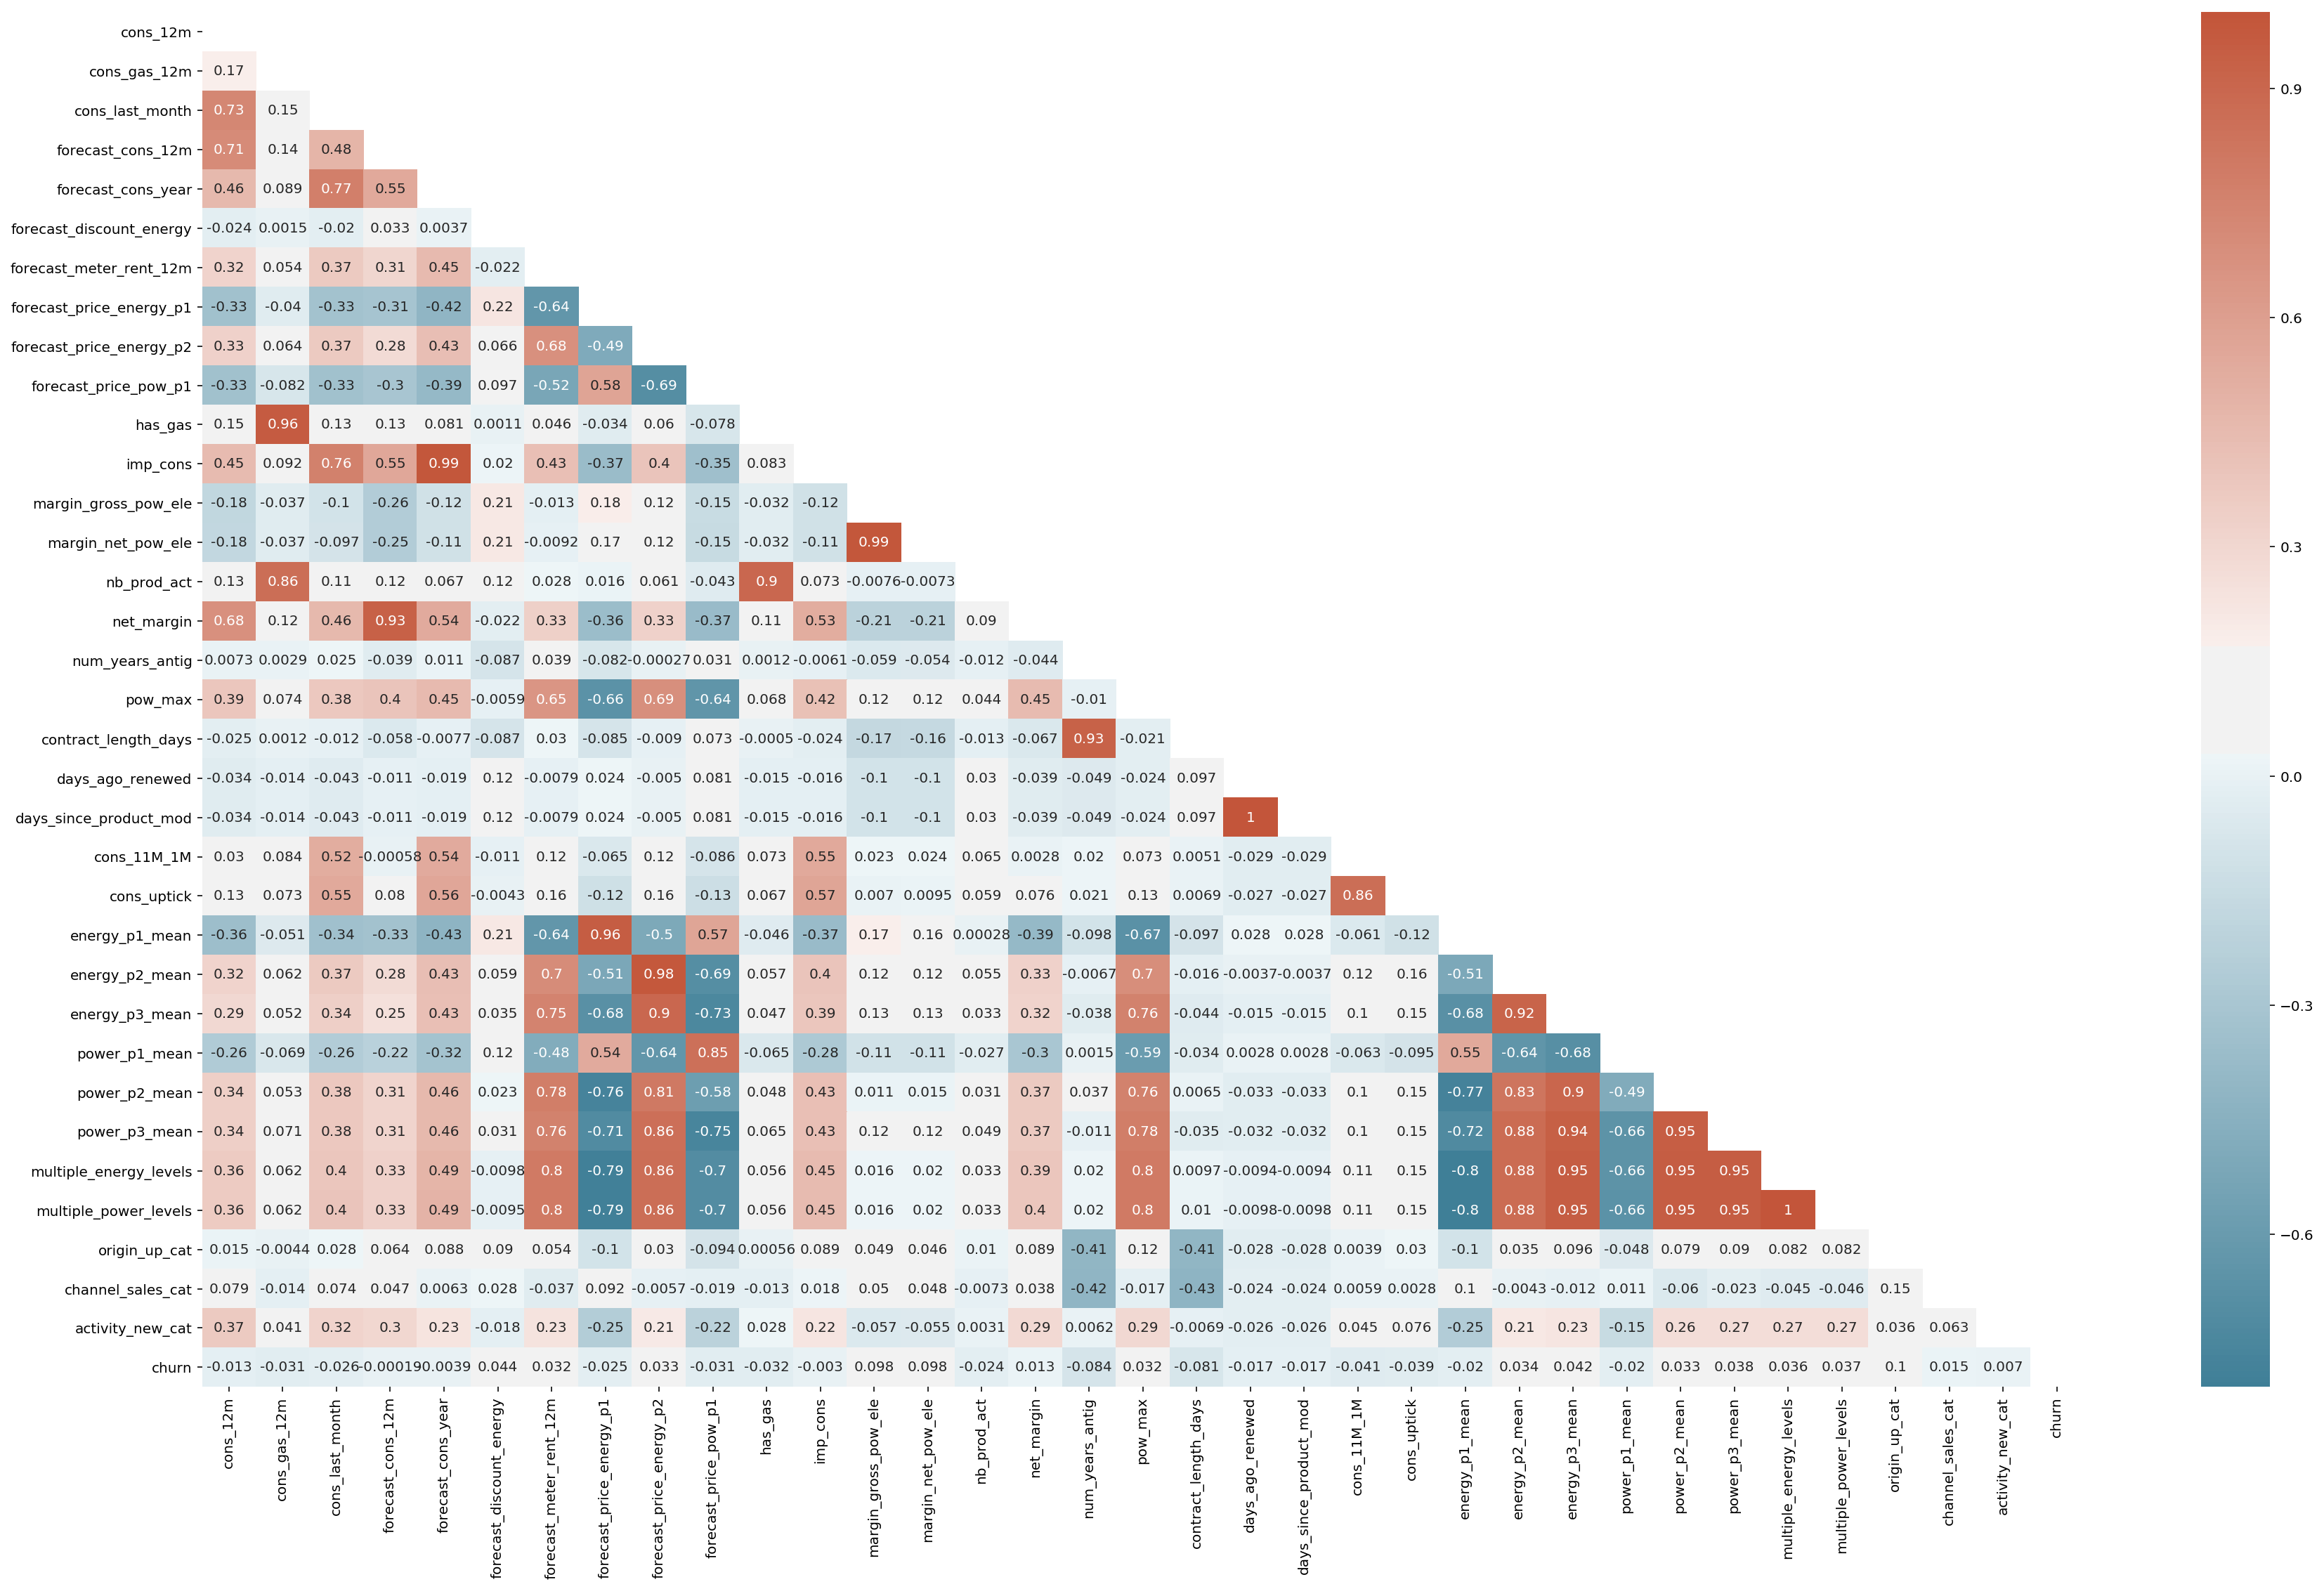

In [72]:
# Heatmap of all numerical features with the target variable to see their correlations
df = pd.concat([train_data_pre_scaled, train_hist_data_scaled, train_origin_up_norm,
                train_channel_sales_norm, train_activity_new_norm, train_churn_data], axis=1)
corr = df.corr('spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

(fig, ax) = plt.subplots(figsize=(30,18))
cmap = sns.diverging_palette(225, 20, sep=20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, annot=True, ax=ax, mask=mask)
None

### Logistic Churn Model
---

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, KFold

In [60]:
# Hypertuning Parameters with 5 fold CV 
lr_gridsearch = GridSearchCV(LogisticRegression(), 
                             param_grid={'penalty' : ['l1','l2'],
                                        'C' : [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10]},
                            cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
lr_gridsearch.fit(X, y)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.1, 0.2, 0.3, 0.5, 1, 2, 5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [61]:
lr_gridsearch.best_score_

0.6462694203129239

In [62]:
lr_gridsearch.best_params_

{'C': 5, 'penalty': 'l1'}

In [63]:
# 5 fold cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, random_state=123)
logreg = LogisticRegression(C=5, penalty='l1')
results = cross_val_score(logreg, X, y, cv=kfold, scoring='roc_auc')
print(results.mean())

0.6459116186301882


In [64]:
logreg.fit(X, y)
logreg.coef_

array([[-5.23590558, -3.80228724,  0.        ,  0.        ,  0.79711177,
        -0.03315341,  0.83786892, -1.67107146,  1.28131742,  0.71584198,
        -0.13978009,  0.93278379,  7.5037165 ,  1.34303602, -0.23289154,
         5.76638203, -1.73613662, -2.68708117,  0.11251959,  0.1144348 ,
         0.13027705,  0.        , -0.28121998,  0.29864623, -0.82180434,
        -2.35018356,  1.4062565 ,  0.7082103 ,  1.72899292, -0.44636255,
         0.        ,  1.73631966, -0.16484544,  0.11846476]])

In [65]:
# Which are the Top 5 features with the highest discriminative power?
logregcv_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg.coef_[0]
},columns=['Feature', 'Coefficient'])
logregcv_df.sort_values('Coefficient', ascending=False, inplace=True)
logregcv_df.head()

,Feature,Coefficient
12,margin_gross_pow_ele,7.503716
15,net_margin,5.766382
31,origin_up_cat,1.736320
28,power_p3_mean,1.728993
26,power_p1_mean,1.406257


### Decision Tree Churn Model
---

In [66]:
# Hypertuning Parameters with 5 fold CV 
grid = GridSearchCV(DecisionTreeClassifier(),
                    param_grid = {'max_depth': [1,2,3,4,5], 
                                  'criterion': ['gini', 'entropy'],
                                 # Lets go for 1, 2, 3 min samples left
                                 'min_samples_leaf': [1,2,3],
                                  # Dont bother splitting unless you have < x elements
                                  'min_samples_split': [2,3,4,5,6]}, verbose=1,
                                    cv=5, scoring='roc_auc')
grid.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:   56.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [67]:
grid.best_score_

0.6361733033215962

In [68]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [69]:
# 5 fold cross validation
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits = 5, random_state=123)
tree_model = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_leaf=1, min_samples_split=5)
results = cross_val_score(tree_model, X, y, cv=kfold, scoring='roc_auc')
print(results.mean())

0.6397165058321125


In [70]:
tree_model.fit(X,y)
tree_model.feature_importances_

array([0.09950526, 0.        , 0.12483217, 0.05562987, 0.        ,
       0.        , 0.        , 0.0087923 , 0.00554819, 0.        ,
       0.        , 0.01295391, 0.26136923, 0.        , 0.        ,
       0.        , 0.01529403, 0.        , 0.11037876, 0.        ,
       0.        , 0.10581947, 0.        , 0.03346194, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.15392508, 0.        , 0.01248979])

In [71]:
# Which are the Top 5 features with the highest discriminative power?
dt_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': tree_model.feature_importances_
},columns=['Feature', 'Coefficient'])
dt_df.sort_values('Coefficient', ascending=False, inplace=True)
dt_df.head()

,Feature,Coefficient
12,margin_gross_pow_ele,0.261369
31,origin_up_cat,0.153925
2,cons_last_month,0.124832
18,contract_length_days,0.110379
21,cons_11M_1M,0.105819


### Random Forest Churn Model
---

In [73]:
# Hypertuning Parameters with 5 fold CV# Hypert 
forest_grid = GridSearchCV(RandomForestClassifier(), 
                      param_grid = {'max_depth': [1,2,3,4,5,6,7], 
                        'criterion': ['gini', 'entropy'],
                      'min_samples_leaf': [1,2,3,4],
                      'min_samples_split': [2,3,4]},
                        cv=5, verbose=1, scoring='roc_auc')
forest_grid.fit(X, y)

Fitting 5 folds for each of 168 candidates, totalling 840 fits


[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:  1.9min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7], 'criterion': ['gini', 'entropy'], 'min_samples_leaf': [1, 2, 3, 4], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [74]:
forest_grid.best_score_

0.6799948574181749

In [75]:
forest_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

In [76]:
# 5 Fold Cross with optimal parameters
kfold = KFold(n_splits=5, random_state=123)
cart = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=2)
rf_results = cross_val_score(cart, X, y, cv=kfold, scoring='roc_auc')
print(rf_results.mean())

0.6751855960950135


In [77]:
cart.fit(X,y)
cart.feature_importances_

array([0.05615535, 0.0354507 , 0.06794739, 0.03164092, 0.01765018,
       0.00745347, 0.05106285, 0.03496159, 0.01337458, 0.00672847,
       0.00568584, 0.02412719, 0.08945194, 0.10704069, 0.00827929,
       0.03065756, 0.02549508, 0.04137373, 0.05696765, 0.00872949,
       0.01260243, 0.05041466, 0.00566   , 0.03680858, 0.01555351,
       0.01479032, 0.02515478, 0.01072781, 0.01293491, 0.0030524 ,
       0.        , 0.06868466, 0.01118421, 0.01219775])

In [78]:
# Which are the Top 5 features with the highest discriminative power?
rf_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': cart.feature_importances_
},columns=['Feature', 'Coefficient'])
rf_df.sort_values('Coefficient', ascending=False, inplace=True)
rf_df.head(10)

,Feature,Coefficient
13,margin_net_pow_ele,0.107041
12,margin_gross_pow_ele,0.089452
31,origin_up_cat,0.068685
2,cons_last_month,0.067947
18,contract_length_days,0.056968
0,cons_12m,0.056155
6,forecast_meter_rent_12m,0.051063
21,cons_11M_1M,0.050415
17,pow_max,0.041374
23,energy_p1_mean,0.036809


### XGBoost Classifier
---

In [79]:
# Hypertuning parameters for 5 fold cross validation split
param = {
 'n_estimators':[50,100],#150,200,300,400],
 'max_depth':[2,3,4,5,6,7,8,9],
 'min_child_weight':[2,3],#4,5],
 'colsample_bytree':[0.2,0.6,0.8]
#'colsample_bylevel':[0.2,0.6,0.8]
}
xgb_grid = GridSearchCV(XGBClassifier(), param_grid = param, cv=5, n_jobs=-1, verbose=1, scoring='roc_auc')
xgb_grid.fit(X, y)

Fitting 5 folds for each of 96 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.2min finished


GridSearchCV(cv=5, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [50, 100], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9], 'min_child_weight': [2, 3], 'colsample_bytree': [0.2, 0.6, 0.8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=1)

In [80]:
xgb_grid.best_score_

0.7144966545708399

In [81]:
xgb_grid.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 7,
 'min_child_weight': 2,
 'n_estimators': 100}

In [82]:
# 5 Fold Cross with optimal parameters
kfold = KFold(n_splits = 5, random_state=123)
xgb_model = XGBClassifier(colsample_bytree=0.8, max_depth=2, min_child_weight=2, n_estimators=100)
xgb_results = cross_val_score(xgb_model, X, y, cv=kfold, scoring='roc_auc')
print(xgb_results.mean())

0.6774895655961698


In [83]:
xgb_model.fit(X,y)
xgb_model.feature_importances_

array([0.08219178, 0.04109589, 0.06849315, 0.02054795, 0.        ,
       0.01369863, 0.02739726, 0.04109589, 0.0239726 , 0.00342466,
       0.00342466, 0.01369863, 0.10958904, 0.08561644, 0.00342466,
       0.0239726 , 0.04794521, 0.03082192, 0.03424658, 0.0239726 ,
       0.        , 0.11986301, 0.        , 0.01369863, 0.        ,
       0.00342466, 0.03082192, 0.01027397, 0.01027397, 0.        ,
       0.        , 0.09246575, 0.01369863, 0.00684932], dtype=float32)

In [84]:
# Which are the Top 5 features with the highest discriminative power?
xgb_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': xgb_model.feature_importances_
},columns=['Feature', 'Coefficient'])
xgb_df.sort_values('Coefficient', ascending=False, inplace=True)
xgb_df.head(10)

,Feature,Coefficient
21,cons_11M_1M,0.119863
12,margin_gross_pow_ele,0.109589
31,origin_up_cat,0.092466
13,margin_net_pow_ele,0.085616
0,cons_12m,0.082192
2,cons_last_month,0.068493
16,num_years_antig,0.047945
7,forecast_price_energy_p1,0.041096
1,cons_gas_12m,0.041096
18,contract_length_days,0.034247


### Neural Network Classifier
---

In [127]:
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import Sequential
from keras.layers import Dense
from tqdm import tqdm

# Create a neural network function to pass it on to the Keras Classifier
def build_neural_network(hidden_units=10):
    nn_model = Sequential()
    nn_model.add(Dense(hidden_units, input_dim=26, kernel_initializer='random_normal',activation='relu'))
    nn_model.add(Dense(1, input_dim=hidden_units, kernel_initializer='random_normal',activation='sigmoid'))
    nn_model.compile(loss='binary_crossentropy', optimizer='adam')
    return nn_model

nn_model = KerasClassifier(build_fn=build_neural_network, epochs=300)

# 5 Fold Cross Validation
nn_results = cross_val_score(nn_model, X, y, cv=kfold, scoring='roc_auc')

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Epoch 1/300
12876/12876 [==============================] - 1s 96us/step - loss: 0.4193
Epoch 2/300
12876/12876 [==============================] - 1s 54us/step - loss: 0.3210
Epoch 3/300
12876/12876 [==============================] - 1s 56us/step - loss: 0.3198
Epoch 4/300
12876/12876 [==============================] - 1s 55us/step - loss: 0.3192
Epoch 5/300
12876/12876 [==============================] - 1s 65us/step - loss: 0.3185: 0s
Epoch 6/300
12876/12876 [==============================] - 1s 65us/step - loss: 0.3176
Epoch 7/300
12876/12876 [==============================] - 1s 56us/step - loss: 0.3170
Epoch 8/300
12876/12876 [==============================] - 1s 52us/step - loss: 0.3165
Epoch 9/300
12876/12876 [==============================] - 1s 53us/step - loss: 0.3162
Epoch 10/300
12876/12876 [==============================] - 1s 53us/step - loss: 0.3157
Epoch 11/300
12876/12876 [==============================] - 1s 54us/step - loss: 0.3152
Epoch 12/300
12876/12876 [===========

12876/12876 [==============================] - 1s 54us/step - loss: 0.3113
Epoch 184/300
12876/12876 [==============================] - 1s 50us/step - loss: 0.3112: 0s - loss: 0.3
Epoch 185/300
12876/12876 [==============================] - 1s 49us/step - loss: 0.3114
Epoch 186/300
12876/12876 [==============================] - 1s 51us/step - loss: 0.3113
Epoch 187/300
12876/12876 [==============================] - 1s 49us/step - loss: 0.3111
Epoch 188/300
12876/12876 [==============================] - 1s 50us/step - loss: 0.3113
Epoch 189/300
12876/12876 [==============================] - 1s 51us/step - loss: 0.3114
Epoch 190/300
12876/12876 [==============================] - 1s 48us/step - loss: 0.3113
Epoch 191/300
12876/12876 [==============================] - 1s 50us/step - loss: 0.3113
Epoch 192/300
12876/12876 [==============================] - 1s 49us/step - loss: 0.3113
Epoch 193/300
12876/12876 [==============================] - 1s 49us/step - loss: 0.3110
Epoch 194/300
12876

12877/12877 [==============================] - 1s 51us/step - loss: 0.3145
Epoch 64/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3148
Epoch 65/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3144
Epoch 66/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3145
Epoch 67/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3148: 0s - lo
Epoch 68/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3148
Epoch 69/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3147
Epoch 70/300
12877/12877 [==============================] - 1s 61us/step - loss: 0.3147
Epoch 71/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3148
Epoch 72/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3146
Epoch 73/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3145: 0s - loss: 0.
Epoch 74/300
12877/12

12877/12877 [==============================] - 1s 59us/step - loss: 0.3132
Epoch 244/300
12877/12877 [==============================] - 1s 67us/step - loss: 0.3132
Epoch 245/300
12877/12877 [==============================] - 1s 61us/step - loss: 0.3133
Epoch 246/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3132
Epoch 247/300
12877/12877 [==============================] - 1s 60us/step - loss: 0.3134
Epoch 248/300
12877/12877 [==============================] - 1s 61us/step - loss: 0.3133
Epoch 249/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3132
Epoch 250/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3133
Epoch 251/300
12877/12877 [==============================] - 1s 59us/step - loss: 0.3133
Epoch 252/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3130: 0s - loss: 0.
Epoch 253/300
12877/12877 [==============================] - 1s 61us/step - loss: 0.3131
Epoch 254/300
12877/

12877/12877 [==============================] - 1s 89us/step - loss: 0.3137
Epoch 127/300
12877/12877 [==============================] - 1s 93us/step - loss: 0.3136
Epoch 128/300
12877/12877 [==============================] - 1s 99us/step - loss: 0.3134
Epoch 129/300
12877/12877 [==============================] - 1s 106us/step - loss: 0.3137
Epoch 130/300
12877/12877 [==============================] - 1s 92us/step - loss: 0.3135
Epoch 131/300
12877/12877 [==============================] - 1s 79us/step - loss: 0.3135
Epoch 132/300
12877/12877 [==============================] - 1s 94us/step - loss: 0.3136
Epoch 133/300
12877/12877 [==============================] - 1s 83us/step - loss: 0.3136
Epoch 134/300
12877/12877 [==============================] - 1s 96us/step - loss: 0.3134
Epoch 135/300
12877/12877 [==============================] - 1s 88us/step - loss: 0.3135
Epoch 136/300
12877/12877 [==============================] - 1s 83us/step - loss: 0.3133
Epoch 137/300
12877/12877 [=======

12877/12877 [==============================] - 1s 57us/step - loss: 0.3189
Epoch 8/300
12877/12877 [==============================] - 1s 58us/step - loss: 0.3181
Epoch 9/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3175
Epoch 10/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3170
Epoch 11/300
12877/12877 [==============================] - 1s 48us/step - loss: 0.3164
Epoch 12/300
12877/12877 [==============================] - 1s 47us/step - loss: 0.3162
Epoch 13/300
12877/12877 [==============================] - 1s 70us/step - loss: 0.3160
Epoch 14/300
12877/12877 [==============================] - 1s 73us/step - loss: 0.3157
Epoch 15/300
12877/12877 [==============================] - 1s 112us/step - loss: 0.3154
Epoch 16/300
12877/12877 [==============================] - 2s 121us/step - loss: 0.3153
Epoch 17/300
12877/12877 [==============================] - 1s 65us/step - loss: 0.3150
Epoch 18/300
12877/12877 [===================

12877/12877 [==============================] - 1s 69us/step - loss: 0.3122
Epoch 190/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3122
Epoch 191/300
12877/12877 [==============================] - 1s 81us/step - loss: 0.3121
Epoch 192/300
12877/12877 [==============================] - 1s 59us/step - loss: 0.3125
Epoch 193/300
12877/12877 [==============================] - 1s 50us/step - loss: 0.3124
Epoch 194/300
12877/12877 [==============================] - 1s 64us/step - loss: 0.3121
Epoch 195/300
12877/12877 [==============================] - 1s 60us/step - loss: 0.3122: 0s - loss: 
Epoch 196/300
12877/12877 [==============================] - 1s 60us/step - loss: 0.3121
Epoch 197/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3122
Epoch 198/300
12877/12877 [==============================] - 1s 55us/step - loss: 0.3123: 0s - loss: 0
Epoch 199/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3121
Epoch 20

12877/12877 [==============================] - 1s 50us/step - loss: 0.3144
Epoch 72/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3147
Epoch 73/300
12877/12877 [==============================] - 1s 49us/step - loss: 0.3145
Epoch 74/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3146
Epoch 75/300
12877/12877 [==============================] - 1s 51us/step - loss: 0.3146
Epoch 76/300
12877/12877 [==============================] - 1s 49us/step - loss: 0.3145
Epoch 77/300
12877/12877 [==============================] - 1s 57us/step - loss: 0.3144
Epoch 78/300
12877/12877 [==============================] - 1s 49us/step - loss: 0.3143
Epoch 79/300
12877/12877 [==============================] - 1s 48us/step - loss: 0.3146
Epoch 80/300
12877/12877 [==============================] - 1s 54us/step - loss: 0.3144
Epoch 81/300
12877/12877 [==============================] - 1s 50us/step - loss: 0.3145
Epoch 82/300
12877/12877 [===================

12877/12877 [==============================] - 1s 56us/step - loss: 0.3134
Epoch 253/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3133
Epoch 254/300
12877/12877 [==============================] - 1s 70us/step - loss: 0.3135
Epoch 255/300
12877/12877 [==============================] - ETA: 0s - loss: 0.311 - 1s 68us/step - loss: 0.3133
Epoch 256/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3135: 0s - loss: 0.314
Epoch 257/300
12877/12877 [==============================] - 1s 56us/step - loss: 0.3135
Epoch 258/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3134
Epoch 259/300
12877/12877 [==============================] - 1s 52us/step - loss: 0.3135
Epoch 260/300
12877/12877 [==============================] - 1s 58us/step - loss: 0.3131
Epoch 261/300
12877/12877 [==============================] - 1s 53us/step - loss: 0.3132
Epoch 262/300
12877/12877 [==============================] - 1s 67us/step - loss: 

In [129]:
print(nn_results.mean())

0.6344906116966375


### ROC Curve Plotting
---

In [85]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, brier_score_loss

In [87]:
y_pred_pp = logreg.predict_proba(X)
y_pred_pp_dt = tree_model.predict_proba(X)
y_pred_pp_rf = cart.predict_proba(X)
y_pred_pp_xgb = xgb_model.predict_proba(X)
#y_pred_pp_nn = nn_model.predict_proba(X)

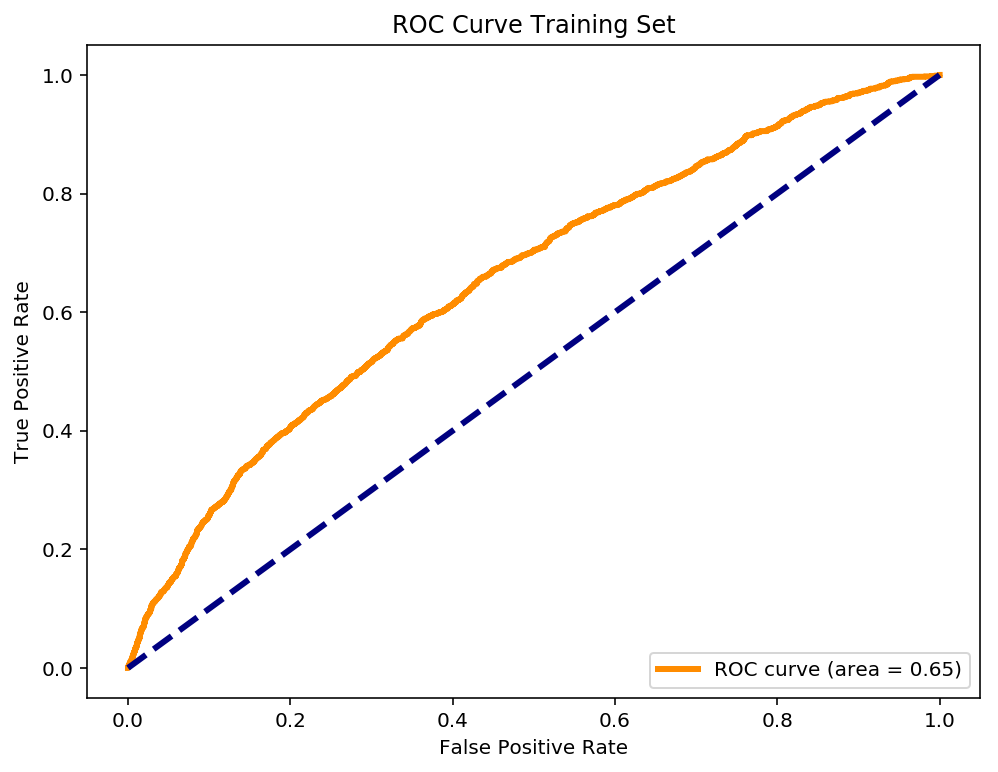

In [88]:
# ROC/AUC plot# ROC/AU 
fpr, tpr, _ = roc_curve(y, y_pred_pp[:,1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=[8,6])
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc, linewidth=3, c='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linewidth=3, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Training Set')
plt.legend(loc="lower right")
plt.show()

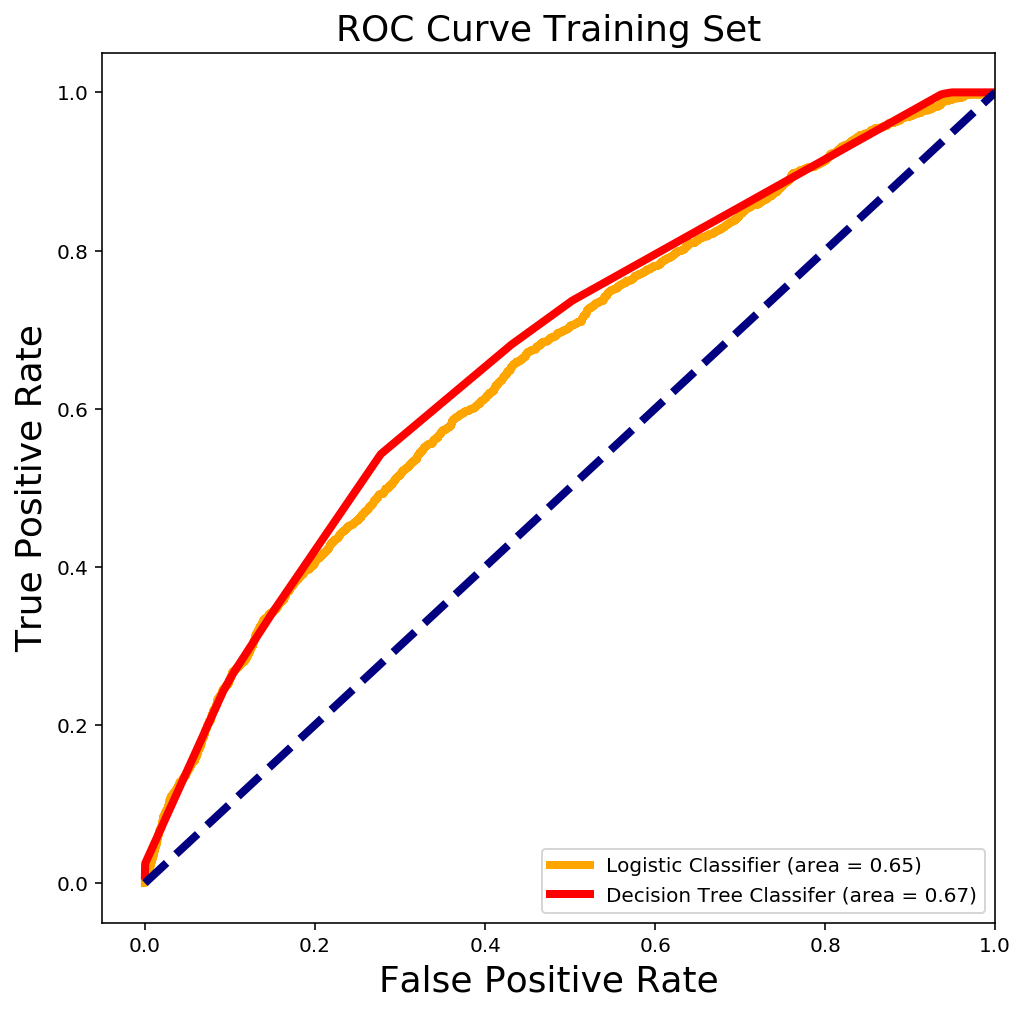

In [89]:
# Plot all the ROC/AUC curves we generated
fpr_dt, tpr_dt, _ = roc_curve(y, y_pred_pp_dt[:,1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='Logistic Classifier (area = %0.2f)' % roc_auc, linewidth=4, color='orange')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Classifer (area = %0.2f)' % roc_auc_dt, linewidth=4, color='red')

plt.plot([0, 1], [0, 1], color='navy', linewidth=4, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve Training Set', fontsize=18)
plt.legend(loc="lower right")
None

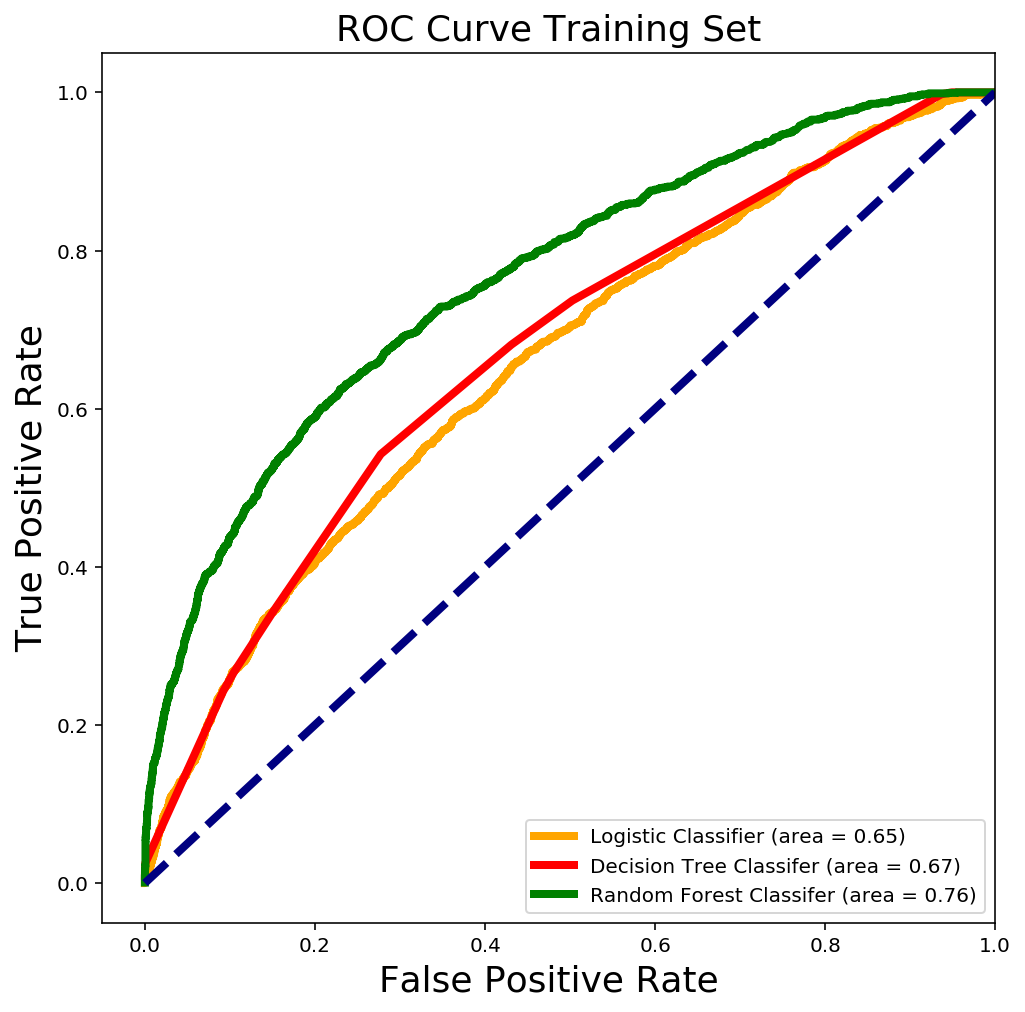

In [90]:
# Plot all the ROC/AUC curves we generated
fpr_rf, tpr_rf, _ = roc_curve(y, y_pred_pp_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='Logistic Classifier (area = %0.2f)' % roc_auc, linewidth=4, color='orange')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Classifer (area = %0.2f)' % roc_auc_dt, linewidth=4, color='red')
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifer (area = %0.2f)' % roc_auc_rf, linewidth=4, color='green')

plt.plot([0, 1], [0, 1], color='navy', linewidth=4, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve Training Set', fontsize=18)
plt.legend(loc="lower right")
None

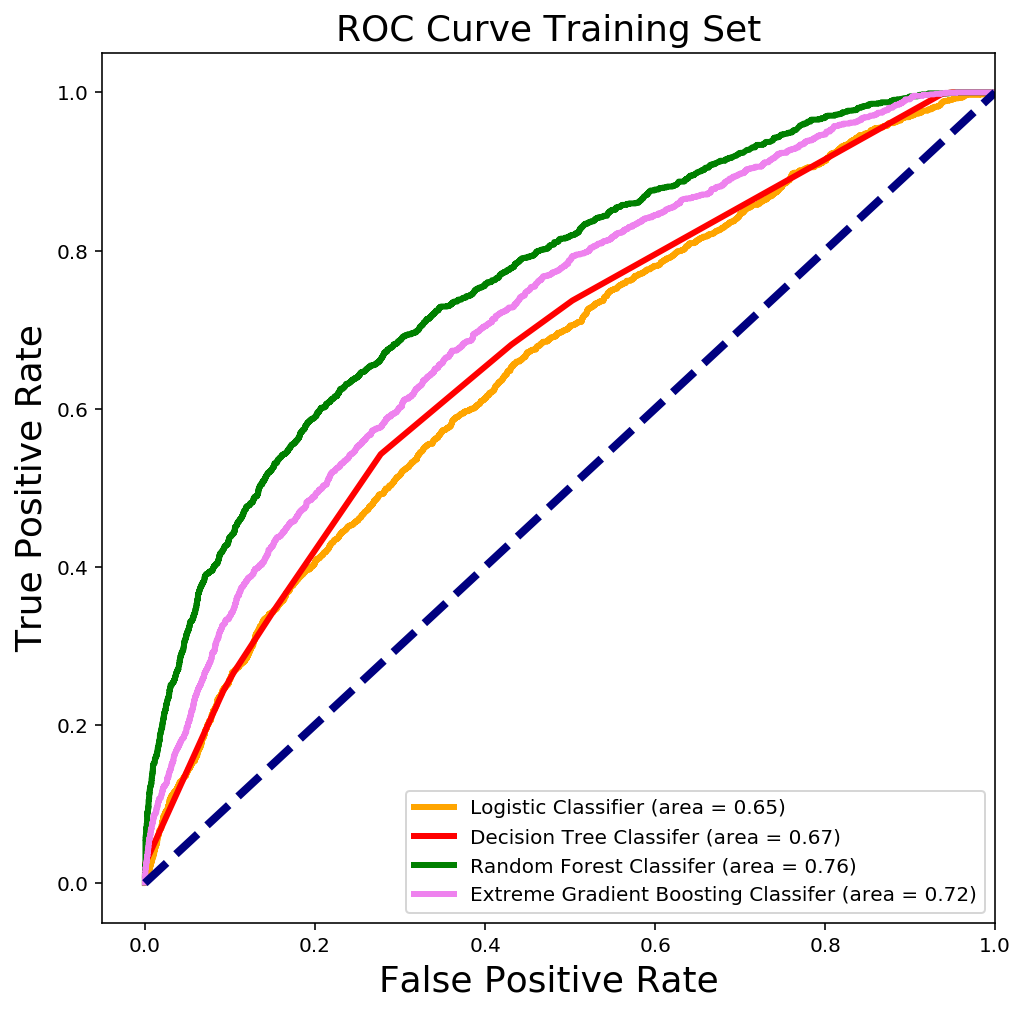

In [91]:
# Plot all the ROC/AUC curves we generated
fpr_xgb, tpr_xgb, _ = roc_curve(y, y_pred_pp_xgb[:,1])
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=[8,8])
plt.plot(fpr, tpr, label='Logistic Classifier (area = %0.2f)' % roc_auc, linewidth=3, color='orange')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Classifer (area = %0.2f)' % roc_auc_dt, linewidth=3, color='red')
plt.plot(fpr_rf, tpr_rf, label='Random Forest Classifer (area = %0.2f)' % roc_auc_rf, linewidth=3, color='green')
plt.plot(fpr_xgb, tpr_xgb, label='Extreme Gradient Boosting Classifer (area = %0.2f)' % roc_auc_xgb, linewidth=3, color='violet')

plt.plot([0, 1], [0, 1], color='navy', linewidth=4, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve Training Set', fontsize=18)
plt.legend(loc="lower right")
None

### Training Set Brier Score Loss
---

In [97]:
print("Brier Score Loss for Logistic Classifier is %s"%brier_score_loss(y, y_pred_pp[:,1]))
print("Brier Score Loss for Decision Tree Classifier is %s"%brier_score_loss(y, y_pred_pp_dt[:,1]))
print("Brier Score Loss for Random Forest Classifier is %s"%brier_score_loss(y, y_pred_pp_rf[:,1]))
print("Brier Score Loss for XGB Classifier is %s"%brier_score_loss(y, y_pred_pp_xgb[:,1]))

Brier Score Loss for Logistic Classifier is 0.08673347565080576
Brier Score Loss for Decision Tree Classifier is 0.08464307310348763
Brier Score Loss for Random Forest Classifier is 0.08137322459245236
Brier Score Loss for XGB Classifier is 0.08394923117533123


Interesting to note that while XGB has the highest AUROC, the Random Forest Classifier has lower Brier Score Loss

## Test Data
---

In [99]:
test_data = pd.read_csv(PATH+'ml_case_test_data.csv', index_col='id')
test_data['date_activ'] = pd.to_datetime(test_data['date_activ'], format='%Y-%m-%d', errors='coerce')
test_data['date_end'] = pd.to_datetime(test_data['date_end'], format='%Y-%m-%d', errors='coerce')
test_data['date_first_activ'] = pd.to_datetime(test_data['date_first_activ'], format='%Y-%m-%d', errors='coerce')
test_data['date_modif_prod'] = pd.to_datetime(test_data['date_modif_prod'], format='%Y-%m-%d', errors='coerce')
test_data['date_renewal'] = pd.to_datetime(test_data['date_renewal'], format='%Y-%m-%d', errors='coerce')
test_data.head()

,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,NaN,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2011-09-06,2016-09-06,NaT,2015-08-27,2015-09-07,NaN,NaN,NaN,NaN,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
9c341e73685fcff6e3527ebd51da3fe5,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2010-12-13,2016-12-31,NaT,2010-12-13,2016-01-01,NaN,NaN,NaN,NaN,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
97dd64b33716aadc4e22c4ab85d1c7a4,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2010-09-04,2016-09-04,NaT,2015-08-27,2015-09-05,NaN,NaN,NaN,NaN,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,NaN,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2011-01-03,2017-01-03,NaT,2011-01-03,2016-01-04,NaN,NaN,NaN,NaN,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
c7c8ee9daf2a864d159d45a2373ada72,NaN,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2011-10-07,2016-10-07,NaT,2015-08-27,2015-10-09,NaN,NaN,NaN,NaN,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


### Preprocessing
---

In [100]:
test_data.shape

(4024, 31)

In [101]:
# Percent of missing data
test_data.isnull().sum()/len(test_data)*100.0

activity_new                 58.499006
campaign_disc_ele           100.000000
channel_sales                26.242545
cons_12m                      0.000000
cons_gas_12m                  0.000000
cons_last_month               0.000000
date_activ                    0.000000
date_end                      0.000000
date_first_activ             78.205765
date_modif_prod               1.118290
date_renewal                  0.099404
forecast_base_bill_ele       78.205765
forecast_base_bill_year      78.205765
forecast_bill_12m            78.205765
forecast_cons                78.205765
forecast_cons_12m             0.000000
forecast_cons_year            0.000000
forecast_discount_energy      0.596421
forecast_meter_rent_12m       0.000000
forecast_price_energy_p1      0.596421
forecast_price_energy_p2      0.596421
forecast_price_pow_p1         0.596421
has_gas                       0.000000
imp_cons                      0.000000
margin_gross_pow_ele          0.049702
margin_net_pow_ele       

In [102]:
test_data_pre = test_data.copy()
test_data_pre.campaign_disc_ele.isnull().all()

True

In [103]:
# Drop columns with >75% of missing observations
test_data_pre = test_data_pre[test_data_pre.columns[test_data_pre.isnull().mean() < 0.75]]
test_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2011-09-06,2016-09-06,2015-08-27,2015-09-07,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,f,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000
9c341e73685fcff6e3527ebd51da3fe5,NaN,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2010-12-13,2016-12-31,2010-12-13,2016-01-01,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,f,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000
97dd64b33716aadc4e22c4ab85d1c7a4,NaN,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2010-09-04,2016-09-04,2015-08-27,2015-09-05,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,f,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321
cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2011-01-03,2017-01-03,2011-01-03,2016-01-04,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,f,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951
c7c8ee9daf2a864d159d45a2373ada72,NaN,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2011-10-07,2016-10-07,2015-08-27,2015-10-09,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,f,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150


In [104]:
# Convert missing activity_new data to NA
test_data_pre.activity_new = test_data_pre.activity_new.fillna(value='NA_activity_new')
# Convert missing channel_sales data (categorical) to NA
test_data_pre.channel_sales = test_data_pre.channel_sales.fillna(value='NA_channel_sales')
# Convert missing origin_up data to NA
test_data_pre.origin_up = test_data_pre.origin_up.fillna(value='NA_origin_up')

In [105]:
# How many levels do each of the categorical variables have?
print('activity_new has %s levels' % test_data_pre.activity_new.nunique())
print('channel_sales has %s levels' % test_data_pre.channel_sales.nunique())
print('origin_up has %s levels' % test_data_pre.origin_up.nunique())
print('has_gas has %s levels' % test_data_pre.has_gas.nunique())

activity_new has 282 levels
channel_sales has 8 levels
origin_up has 5 levels
has_gas has 2 levels


In [106]:
# Convert has_gas t and f responses to 0 and 1
lb = LabelBinarizer()
test_data_pre.has_gas = lb.fit_transform(test_data_pre.has_gas)

In [107]:
# Use Label Encoder for categorical variables
test_activity_new_cat = pd.DataFrame(test_data_pre.activity_new.astype('category').cat.codes)
test_channel_sales_cat = pd.DataFrame(test_data_pre.channel_sales.astype('category').cat.codes)
test_origin_up_cat = pd.DataFrame(test_data_pre.origin_up.astype('category').cat.codes)
test_activity_new_cat.columns = ['activity_new_cat']
test_channel_sales_cat.columns = ['channel_sales_cat']
test_origin_up_cat.columns = ['origin_up_cat']

In [108]:
# Use imputation (mean) to fill in the rest of the variables
imputer = Imputer()
test_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin',
               'pow_max']] = imputer.fit_transform(test_data_pre[['forecast_discount_energy','forecast_price_energy_p1','forecast_price_energy_p2',
               'forecast_price_pow_p1','margin_gross_pow_ele','margin_net_pow_ele','net_margin','pow_max']])

In [109]:
test_data_pre.isnull().sum()/len(test_data_pre)*100.0

activity_new                0.000000
channel_sales               0.000000
cons_12m                    0.000000
cons_gas_12m                0.000000
cons_last_month             0.000000
date_activ                  0.000000
date_end                    0.000000
date_modif_prod             1.118290
date_renewal                0.099404
forecast_cons_12m           0.000000
forecast_cons_year          0.000000
forecast_discount_energy    0.000000
forecast_meter_rent_12m     0.000000
forecast_price_energy_p1    0.000000
forecast_price_energy_p2    0.000000
forecast_price_pow_p1       0.000000
has_gas                     0.000000
imp_cons                    0.000000
margin_gross_pow_ele        0.000000
margin_net_pow_ele          0.000000
nb_prod_act                 0.000000
net_margin                  0.000000
num_years_antig             0.000000
origin_up                   0.000000
pow_max                     0.000000
dtype: float64

### Feature Engineering
---

In [110]:
# Length of the contract in days
test_data_pre['contract_length_days'] = (test_data_pre.date_end - test_data_pre.date_activ).dt.days
# How many days since the end of the contract was the last renewal?
test_data_pre['days_ago_renewed'] = (test_data_pre.date_end - test_data_pre.date_renewal).dt.days
# How many days since the last product modification?
test_data_pre['days_since_product_mod'] = (test_data_pre.date_end - test_data_pre.date_renewal).dt.days
# What was usage in the last month compared to average usage in the previous 11 months?
test_data_pre['cons_11M_1M'] = \
    test_data_pre.cons_last_month - (test_data_pre.cons_12m - test_data_pre.cons_last_month)/11
# Energy usage uptick
test_data_pre['cons_uptick'] = np.where(test_data_pre['cons_11M_1M'] < 0, 0, 1)

In [111]:
test_data_pre.head()

,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ed18c9981ce183ef347246cdcc55f743,bwpaswkpcilmlklklcapcwwumwaodaoo,foosdfpfkusacimwkcsosbicdxkicaua,42132,0,3215,2011-09-06,2016-09-06,2015-08-27,2015-09-07,4001.08,3215,0.0,130.43,0.114603,0.098261,40.606701,0,296.90,9.63,9.63,1,488.25,4,lxidpiddsbxsbosboudacockeimpuepw,20.000,1827,365.0,365.0,-322.909091,0
9c341e73685fcff6e3527ebd51da3fe5,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,3537,0,563,2010-12-13,2016-12-31,2010-12-13,2016-01-01,518.22,563,0.0,23.20,0.142174,0.000000,44.444710,0,80.66,0.12,0.12,1,29.18,5,lxidpiddsbxsbosboudacockeimpuepw,15.000,2210,365.0,365.0,292.636364,1
97dd64b33716aadc4e22c4ab85d1c7a4,NA_activity_new,foosdfpfkusacimwkcsosbicdxkicaua,6543,0,399,2010-09-04,2016-09-04,2015-08-27,2015-09-05,639.65,399,0.0,130.32,0.115182,0.098841,40.606701,0,37.91,15.53,15.53,1,74.59,5,lxidpiddsbxsbosboudacockeimpuepw,17.321,2192,365.0,365.0,-159.545455,0
cf81de72ff7997ed10729751059cf7a3,apdekpcbwosbxepsfxclislboipuxpop,foosdfpfkusacimwkcsosbicdxkicaua,186838,0,12091,2011-01-03,2017-01-03,2011-01-03,2016-01-04,2634.23,738,0.0,16.42,0.164058,0.086163,44.311378,0,93.12,27.00,27.00,1,210.18,5,lxidpiddsbxsbosboudacockeimpuepw,11.951,2192,365.0,365.0,-3795.090909,0
c7c8ee9daf2a864d159d45a2373ada72,NA_activity_new,usilxuppasemubllopkaafesmlibmsdf,19051,0,0,2011-10-07,2016-10-07,2015-08-27,2015-10-09,2801.47,0,0.0,0.00,0.141434,0.000000,44.311378,0,0.00,8.62,8.62,1,223.23,4,lxidpiddsbxsbosboudacockeimpuepw,13.150,1827,364.0,364.0,-1731.909091,0


### Pricing Data: 2015
---

In [112]:
test_hist_data = pd.read_csv(PATH+'ml_case_test_hist_data.csv', index_col='id')
test_hist_data['price_date'] = pd.to_datetime(test_hist_data['price_date'], format='%Y-%m-%d', errors='coerce')
test_hist_data.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
3acc714fbd9b3ccaac3c412cf220e929,2015-01-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-02-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-03-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-04-01,0.168185,0.084213,0.0,44.266931,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-05-01,0.168185,0.084213,0.0,44.266930,0.0,0.0


In [113]:
test_hist_data.isnull().sum()

price_date        0
price_p1_var    302
price_p2_var    302
price_p3_var    302
price_p1_fix    302
price_p2_fix    302
price_p3_fix    302
dtype: int64

In [114]:
test_hist_data.dropna(inplace=True)
test_hist_data.isnull().sum()

price_date      0
price_p1_var    0
price_p2_var    0
price_p3_var    0
price_p1_fix    0
price_p2_fix    0
price_p3_fix    0
dtype: int64

In [115]:
# % of customers w/o energy pricing for p1?
(test_hist_data.groupby('id')['price_p1_var'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

0.09940357852882703

In [116]:
# % of customers w/o energy pricing for p2?
(test_hist_data.groupby('id')['price_p2_var'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

45.17892644135189

In [117]:
# % of customers w/o energy pricing for p3?
(test_hist_data.groupby('id')['price_p3_var'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

57.80318091451292

In [118]:
# % of customers w/o power pricing for p1?
(test_hist_data.groupby('id')['price_p1_fix'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

0.5715705765407555

In [119]:
# % of customers w/o power pricing for p2?
(test_hist_data.groupby('id')['price_p2_fix'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

57.87773359840954

In [120]:
# % of customers w/o power pricing for p3?
(test_hist_data.groupby('id')['price_p3_fix'].mean() == 0).sum()/test_hist_data.index.nunique()*100.0

57.87773359840954

In [121]:
# Does customer have multiple pricing levels
test_hist_data_pre = test_hist_data.copy()
test_hist_data_pre['energy_p1_mean'] = test_hist_data_pre.groupby('id')['price_p1_var'].mean()
test_hist_data_pre['energy_p2_mean'] = test_hist_data_pre.groupby('id')['price_p2_var'].mean()
test_hist_data_pre['energy_p3_mean'] = test_hist_data_pre.groupby('id')['price_p3_var'].mean()
test_hist_data_pre['power_p1_mean'] = test_hist_data_pre.groupby('id')['price_p1_fix'].mean()
test_hist_data_pre['power_p2_mean'] = test_hist_data_pre.groupby('id')['price_p2_fix'].mean()
test_hist_data_pre['power_p3_mean'] = test_hist_data_pre.groupby('id')['price_p3_fix'].mean()
test_hist_data_pre.head()

,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean
id,,,,,,,,,,,,,
3acc714fbd9b3ccaac3c412cf220e929,2015-01-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-02-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-03-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-04-01,0.168185,0.084213,0.0,44.266931,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0
3acc714fbd9b3ccaac3c412cf220e929,2015-05-01,0.168185,0.084213,0.0,44.266930,0.0,0.0,0.167797,0.086114,0.0,44.35582,0.0,0.0


In [122]:
test_hist_data_pre = test_hist_data_pre.groupby(['id'])[['energy_p1_mean', 'energy_p2_mean', 'energy_p3_mean',
                                    'power_p1_mean', 'power_p2_mean', 'power_p3_mean']].mean()

In [123]:
# Multiple energy levels or multiple power levels?
test_hist_data_pre['multiple_energy_levels'] = \
np.where((test_hist_data_pre.energy_p2_mean == 0)|(test_hist_data_pre.energy_p3_mean == 0), 0, 1)
test_hist_data_pre['multiple_power_levels'] = \
np.where((test_hist_data_pre.power_p2_mean == 0)|(test_hist_data_pre.power_p3_mean == 0), 0, 1)
test_hist_data_pre.head()

,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels
id,,,,,,,,
000381698491fec6983d55828fe5ada6,0.101811,0.090583,0.066138,59.055122,36.417707,8.350996,1,1
000861c9aa2a0784b8d83f8b5b95d010,0.124524,0.104134,0.075021,40.661003,24.396601,16.264402,1,1
0032d340d01dce810b28c3e2a5446fcc,0.124174,0.103638,0.072865,40.688156,24.412893,16.275263,1,1
004a743cb630d0540d8016fc6c898786,0.151425,0.000000,0.000000,44.444710,0.000000,0.000000,0,0
007d5d9fbd142235658fe836cfd338fa,0.122726,0.102185,0.072778,40.633851,24.380309,16.253540,1,1


### Churn Data Template: Mar-16
---

In [124]:
test_churn_data_template = pd.read_csv(PATH+'ml_case_test_output_template.csv', index_col='id')
test_churn_data_template.head()

,Unnamed: 0,Churn_prediction,Churn_probability
id,,,
ed18c9981ce183ef347246cdcc55f743,1,NaN,NaN
9c341e73685fcff6e3527ebd51da3fe5,2,NaN,NaN
97dd64b33716aadc4e22c4ab85d1c7a4,3,NaN,NaN
cf81de72ff7997ed10729751059cf7a3,4,NaN,NaN
c7c8ee9daf2a864d159d45a2373ada72,5,NaN,NaN


### Scaling Variables
---
Standardize trainind datasets into a scale between 0 and 1 before using them together.

In [126]:
test_data_pre_scaled = normalize(test_data_pre.drop(['activity_new', 'channel_sales', 'origin_up','date_activ', 'date_end', 'date_modif_prod',
       'date_renewal'], axis=1))
test_hist_data_scaled = normalize(test_hist_data_pre)
test_activity_new_norm = normalize(test_activity_new_cat)
test_origin_up_norm = normalize(test_origin_up_cat)
test_channel_sales_norm = normalize(test_channel_sales_cat)

### Merge Dataframes
---

In [129]:
test_df = pd.concat([test_data_pre_scaled, test_hist_data_scaled, test_origin_up_norm, test_channel_sales_norm, 
                     test_activity_new_norm], axis=1)
test_df.head()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,contract_length_days,days_ago_renewed,days_since_product_mod,cons_11M_1M,cons_uptick,energy_p1_mean,energy_p2_mean,energy_p3_mean,power_p1_mean,power_p2_mean,power_p3_mean,multiple_energy_levels,multiple_power_levels,origin_up_cat,channel_sales_cat,activity_new_cat
000381698491fec6983d55828fe5ada6,0.059091,0.001517,0.058422,0.355185,0.241693,0.0,0.562211,0.346842,0.516075,0.995437,0.0,0.227994,0.483789,0.641563,0.000000,0.615221,0.363636,0.490196,0.323894,0.040470,0.040470,0.380205,1.0,0.365731,0.629208,0.666338,0.995105,0.998000,0.495705,1.0,1.0,1.00,0.714286,0.000000
000861c9aa2a0784b8d83f8b5b95d010,0.015412,0.012672,0.028867,0.095132,0.119422,0.0,0.250230,0.426736,0.598315,0.685156,1.0,0.131049,0.529214,0.673104,0.064516,0.440138,0.181818,0.036767,0.122377,0.000000,0.000000,0.379699,0.0,0.447321,0.723338,0.755838,0.685156,0.668571,0.965436,1.0,1.0,1.00,1.000000,0.000000
0032d340d01dce810b28c3e2a5446fcc,0.013437,0.001517,0.028016,0.083036,0.115905,0.0,0.232440,0.426700,0.595002,0.685156,0.0,0.128125,0.546814,0.685325,0.000000,0.417499,0.909091,0.036767,0.876359,0.039164,0.039164,0.380430,1.0,0.446066,0.719892,0.734114,0.685613,0.669017,0.966080,1.0,1.0,0.75,0.000000,0.469751
004a743cb630d0540d8016fc6c898786,0.013067,0.024134,0.027267,0.081999,0.112805,0.0,0.061948,0.538416,0.000000,0.772898,1.0,0.125206,0.534928,0.677072,0.032258,0.415730,0.181818,0.032353,0.214918,0.040470,0.040470,0.379653,0.0,0.543959,0.000000,0.000000,0.748913,0.000000,0.000000,0.0,0.0,0.50,1.000000,0.195730
007d5d9fbd142235658fe836cfd338fa,0.013178,0.002634,0.027600,0.081243,0.114183,0.0,0.230920,0.420400,0.587993,0.685156,1.0,0.126462,0.536143,0.677916,0.032258,0.414685,0.272727,0.041667,0.214918,0.037859,0.037859,0.380054,0.0,0.440862,0.709798,0.733232,0.684698,0.668124,0.964791,1.0,1.0,1.00,0.571429,0.000000


In [130]:
test_df.shape

(4024, 34)

### Predict with XGBoost Classifier
---

In [131]:
xgb_model = XGBClassifier(colsample_bytree=0.8, max_depth=7, min_child_weight=2, n_estimators=100, scale_pos_weight=9)
xgb_model.fit(X, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=7, min_child_weight=2, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=9, seed=None,
       silent=True, subsample=1)

In [132]:
xgb_prediction = xgb_model.predict(test_df.fillna(0))
# Check your prediction has positive and negative churn predictions
pd.Series(xgb_prediction).value_counts()

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    4018
1       6
dtype: int64

In [133]:
xgb_prediction

array([0, 0, 0, ..., 0, 0, 0])

In [134]:
xgb_predict_proba = xgb_model.predict_proba(test_df.fillna(0))

In [135]:
xgb_predict_proba[:,1]

array([0.03602663, 0.0422499 , 0.09231983, ..., 0.02430415, 0.0201193 ,
       0.0184011 ], dtype=float32)

In [136]:
test_churn_data_template['Churn_prediction'] = xgb_prediction.tolist()
test_churn_data_template['Churn_probability'] = xgb_predict_proba[:,1].tolist()
test_churn_data_template.head()

,Unnamed: 0,Churn_prediction,Churn_probability
id,,,
ed18c9981ce183ef347246cdcc55f743,1,0,0.036027
9c341e73685fcff6e3527ebd51da3fe5,2,0,0.042250
97dd64b33716aadc4e22c4ab85d1c7a4,3,0,0.092320
cf81de72ff7997ed10729751059cf7a3,4,0,0.041149
c7c8ee9daf2a864d159d45a2373ada72,5,0,0.035334


### Predict with Random Forest Classifier
---

In [137]:
rf_model = RandomForestClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2, min_samples_split=2)
rf_model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [138]:
rf_prediction = xgb_model.predict(test_df.fillna(0))
# Check your prediction has positive and negative churn predictions
pd.Series(rf_prediction).value_counts()

/usr/local/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0    4018
1       6
dtype: int64

In [139]:
rf_predict_proba = rf_model.predict_proba(test_df.fillna(0))

In [140]:
test_churn_data_template['rf_churn_prediction'] = rf_prediction.tolist()
test_churn_data_template['rf_churn_probability'] = rf_predict_proba[:,1].tolist()
test_churn_data_template.head()

,Unnamed: 0,Churn_prediction,Churn_probability,rf_churn_prediction,rf_churn_probability
id,,,,,
ed18c9981ce183ef347246cdcc55f743,1,0,0.036027,0,0.189125
9c341e73685fcff6e3527ebd51da3fe5,2,0,0.042250,0,0.146152
97dd64b33716aadc4e22c4ab85d1c7a4,3,0,0.092320,0,0.229616
cf81de72ff7997ed10729751059cf7a3,4,0,0.041149,0,0.109549
c7c8ee9daf2a864d159d45a2373ada72,5,0,0.035334,0,0.146675


### Place in descending order of probability to churn
---
* Save to Excel

In [201]:
test_churn_output = test_churn_data_template.copy()
test_churn_output = test_churn_output.sort_values('Churn_probability', ascending=False)

In [203]:
# Export to csv
test_churn_output.to_csv('bcg_gamma_output.csv')